In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import pickle
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


import tensorflow as tf
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score, f1_score

from tensorflow import keras
from tensorflow.keras.layers import Input
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam


In [ ]:
#load dataset
data = pd.read_excel('Book1.xlsx', sheet_name='Sheet6') #data train

#read dataset
data

X1        X2          X3         X4         X5     X6     X7    X8  \
0    84552  0.502649  179.300000  23.500000  75.000000   9848   8031  4162   
1    72010  0.509110  179.300000  23.500000  75.000000   9173   5104  2938   
2    77490  0.500129  179.300000  23.500000  75.000000  15673  12563  5527   
3    38633  0.504154  179.300000  23.500000  75.000000   4603   4295  1888   
4    84662  0.504619  179.300000  23.500000  75.000000   9349   6568  3542   
5    76256  0.499948  179.300000  23.500000  75.000000  11084   8939  3898   
6   122672  0.506845  173.298220  23.559228  75.789708  10171   8050  5554   
7    99435  0.501980  179.300000  23.500000  75.000000  13659   9751  5068   
8    73696  0.500461  179.300000  23.500000  75.000000   7516   6416  3593   
9   124038  0.504422  126.770808  23.719094  77.224725  14681  10269  6194   
10  100784  0.501478  179.300000  23.500000  75.000000  14286  10053  5239   
11  132532  0.505345  196.775587  23.605529  75.211058  12010  10679  5266   
12   69077  0.498907  179.300000  23.500000  75.000000  12258   9126  4548   
13   84836  0.507733  179.300000  23.500000  75.000000   8561   4256  2563   
14  133255  0.505581  215.072967  23.716020  75.432041  13455  12147  5680   
15  137077  0.509962  179.300000  23.500000  75.000000  15652   5225  3347   
16   39640  0.504970  179.300000  23.500000  75.000000   4812   3879  1764   
17   82029  0.497958  179.300000  23.500000  75.000000  14027   9772  4119   
18   79470  0.500164  179.300000  23.500000  75.000000  12478   8241  4092   
19   74088  0.504598  238.224213  23.822920  78.138102  10570   7463  3630   
20   94998  0.503632  179.300000  23.500000  75.000000  11596   8760  4509   
21  138172  0.509996  237.821962  23.564028  74.615830  15570   5582  3534   
22  103212  0.502110  211.037831  23.559262  75.622143  10624   7331  3703   
23   28793  0.498767  179.300000  23.500000  75.000000   4481   3071  1668   
24   74780  0.502126  179.300000  23.500000  75.000000  12588   9120  4411   
25  131842  0.505120  179.300000  23.500000  75.000000  10631   9278  4870   
26   69501  0.504266  179.300000  23.500000  75.000000   6072   3831  2705   
27  100303  0.501490  179.300000  23.500000  75.000000  13412   9385  4877   
28   58967  0.499992  179.300000  23.500000  75.000000   7847   5832  2857   
29   98790  0.501528  179.300000  23.500000  75.000000  10661   7286  3741   

       X9    X10  ...        X18    X19    X20   X21    X22    X23    X24  \
0   14186  10404  ...  76.542872  14214   6466  3798  12318  27842  22356   
1    8979   9933  ...  75.334025   1771   1822   915   3188   3088   3779   
2   18683   5950  ...  77.130015  11247   7317  3798  13492  13641  16633   
3    6864   2873  ...  77.400000   7533   6443  4964  11936  20563  20591   
4   11696  12476  ...  77.363293   7702   6677  5039  12191  20808  20725   
5   14008   8780  ...  77.400000  11325   6317  3534  11241  15645  13591   
6   14797  18492  ...  77.400000  15530   5021  3341  10060  29241  22596   
7   17420  13452  ...  77.400000   4493   3664  1712   6631   3258   4450   
8   12829   8339  ...  77.400000  11653   8724  3977  13516   8409   8138   
9   18154  17663  ...  77.400000  11325   7430  3910  13316  12816  13433   
10  17913  14112  ...  77.400000   5443   3475  1925   7059   8746   6639   
11  17916  23831  ...  77.400000  11351   7119  3687  13165  12299  15909   
12  14512   6439  ...  77.400000   9893   5097  2971   9009  10560  11145   
13   7761  15752  ...  77.400000  10961   7681  3953  13880  11134  12318   
14  19229  23607  ...  77.400000  10386   6913  3985  12805  14364  17136   
15  10605  29272  ...  76.174590   9073   7883  4930  14336  22432  21175   
16   5900   4011  ...  77.400000  14610   9468  4950  16646  14612  13930   
17  15298   8318  ...  77.400000   9853   6300  3437  11167  10508  12076   
18  14348   7580  ...  76.117378   9149   7951  4927  14450  22511  21197   
19  12111   9024  ...  77.400000  11060   6937  3

#Preprocessing

In [ ]:
# mengecek missing values
data.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
Y      0
dtype: int64

In [ ]:
data.dropna()

X1        X2          X3         X4         X5     X6     X7    X8  \
0    84552  0.502649  179.300000  23.500000  75.000000   9848   8031  4162   
1    72010  0.509110  179.300000  23.500000  75.000000   9173   5104  2938   
2    77490  0.500129  179.300000  23.500000  75.000000  15673  12563  5527   
3    38633  0.504154  179.300000  23.500000  75.000000   4603   4295  1888   
4    84662  0.504619  179.300000  23.500000  75.000000   9349   6568  3542   
5    76256  0.499948  179.300000  23.500000  75.000000  11084   8939  3898   
6   122672  0.506845  173.298220  23.559228  75.789708  10171   8050  5554   
7    99435  0.501980  179.300000  23.500000  75.000000  13659   9751  5068   
8    73696  0.500461  179.300000  23.500000  75.000000   7516   6416  3593   
9   124038  0.504422  126.770808  23.719094  77.224725  14681  10269  6194   
10  100784  0.501478  179.300000  23.500000  75.000000  14286  10053  5239   
11  132532  0.505345  196.775587  23.605529  75.211058  12010  10679  5266   
12   69077  0.498907  179.300000  23.500000  75.000000  12258   9126  4548   
13   84836  0.507733  179.300000  23.500000  75.000000   8561   4256  2563   
14  133255  0.505581  215.072967  23.716020  75.432041  13455  12147  5680   
15  137077  0.509962  179.300000  23.500000  75.000000  15652   5225  3347   
16   39640  0.504970  179.300000  23.500000  75.000000   4812   3879  1764   
17   82029  0.497958  179.300000  23.500000  75.000000  14027   9772  4119   
18   79470  0.500164  179.300000  23.500000  75.000000  12478   8241  4092   
19   74088  0.504598  238.224213  23.822920  78.138102  10570   7463  3630   
20   94998  0.503632  179.300000  23.500000  75.000000  11596   8760  4509   
21  138172  0.509996  237.821962  23.564028  74.615830  15570   5582  3534   
22  103212  0.502110  211.037831  23.559262  75.622143  10624   7331  3703   
23   28793  0.498767  179.300000  23.500000  75.000000   4481   3071  1668   
24   74780  0.502126  179.300000  23.500000  75.000000  12588   9120  4411   
25  131842  0.505120  179.300000  23.500000  75.000000  10631   9278  4870   
26   69501  0.504266  179.300000  23.500000  75.000000   6072   3831  2705   
27  100303  0.501490  179.300000  23.500000  75.000000  13412   9385  4877   
28   58967  0.499992  179.300000  23.500000  75.000000   7847   5832  2857   
29   98790  0.501528  179.300000  23.500000  75.000000  10661   7286  3741   

       X9    X10  ...        X18    X19    X20   X21    X22    X23    X24  \
0   14186  10404  ...  76.542872  14214   6466  3798  12318  27842  22356   
1    8979   9933  ...  75.334025   1771   1822   915   3188   3088   3779   
2   18683   5950  ...  77.130015  11247   7317  3798  13492  13641  16633   
3    6864   2873  ...  77.400000   7533   6443  4964  11936  20563  20591   
4   11696  12476  ...  77.363293   7702   6677  5039  12191  20808  20725   
5   14008   8780  ...  77.400000  11325   6317  3534  11241  15645  13591   
6   14797  18492  ...  77.400000  15530   5021  3341  10060  29241  22596   
7   17420  13452  ...  77.400000   4493   3664  1712   6631   3258   4450   
8   12829   8339  ...  77.400000  11653   8724  3977  13516   8409   8138   
9   18154  17663  ...  77.400000  11325   7430  3910  13316  12816  13433   
10  17913  14112  ...  77.400000   5443   3475  1925   7059   8746   6639   
11  17916  23831  ...  77.400000  11351   7119  3687  13165  12299  15909   
12  14512   6439  ...  77.400000   9893   5097  2971   9009  10560  11145   
13   7761  15752  ...  77.400000  10961   7681  3953  13880  11134  12318   
14  19229  23607  ...  77.400000  10386   6913  3985  12805  14364  17136   
15  10605  29272  ...  76.174590   9073   7883  4930  14336  22432  21175   
16   5900   4011  ...  77.400000  14610   9468  4950  16646  14612  13930   
17  15298   8318  ...  77.400000   9853   6300  3437  11167  10508  12076   
18  14348   7580  ...  76.117378   9149   7951  4927  14450  22511  21197   
19  12111   9024  ...  77.400000  11060   6937  3

In [ ]:
# menampilkan nilai korelasi atribut terhadap target
corr = data.corr()
correlation = (pd.DataFrame(corr.Y))
correlation.sort_values(by='Y', ascending=False).style.background_gradient(cmap='coolwarm_r')

2    16
1    12
0     2
Name: Y, dtype: int64


<Axes: xlabel='Y', ylabel='count'>

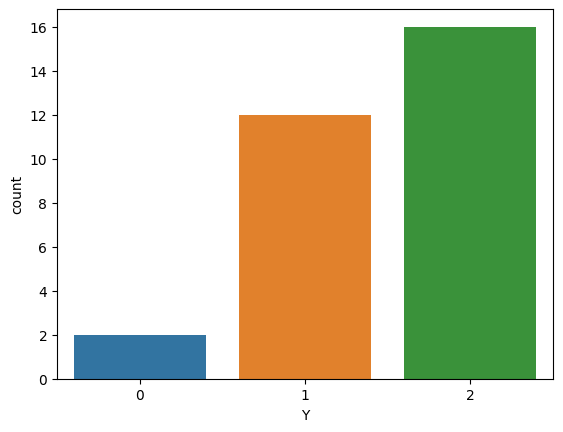

In [ ]:
# menampilkan persebaran label class
print(data['Y'].value_counts())

# plot persebaran label class
sns.countplot(data=data, x='Y')

In [ ]:
# menampilkan statistik dataset
data.describe()

X1         X2          X3         X4         X5  \
count      30.000000  30.000000   30.000000  30.000000  30.000000   
mean    89519.666667   0.503335  184.096720  23.534869  75.234454   
std     29475.808741   0.003271   19.995134   0.079811   0.708021   
min     28793.000000   0.497958  126.770808  23.500000  74.615830   
25%     73794.000000   0.500716  179.300000  23.500000  75.000000   
50%     84607.000000   0.503140  179.300000  23.500000  75.000000   
75%    102605.000000   0.505082  179.300000  23.500000  75.000000   
max    138172.000000   0.509996  238.224213  23.822920  78.138102   

                 X6            X7           X8            X9           X10  \
count     30.000000     30.000000    30.000000     30.000000     30.000000   
mean   10911.600000   7676.766667  3982.900000  13347.266667  12613.333333   
std     3253.138078   2519.356974  1194.122628   3907.168328   7293.642930   
min     4481.000000   3071.000000  1668.000000   5150.000000   2348.000000   
25%     9217.000000   5644.500000  3393.750000  10791.250000   8108.750000   
50%    10872.500000   8040.500000  3995.000000  14097.000000  10842.500000   
75%    13444.250000   9358.250000  4875.250000  16446.750000  15342.000000   
max    15673.000000  12563.000000  6194.000000  19229.000000  29444.000000   

       ...        X18           X19           X20          X21           X22  \
count  ...  30.000000     30.000000     30.000000    30.000000     30.000000   
mean   ...  77.180410   9927.666667   6470.933333  3582.533333  11509.000000   
std    ...   0.595748   3713.370793   2227.435110  1256.632603   3779.591394   
min    ...  75.334025   1771.000000   1822.000000   915.000000   3188.000000   
25%    ...  77.320610   8044.750000   5107.000000  3063.500000   9271.750000   
50%    ...  77.400000  10401.000000   6866.500000  3757.500000  12339.000000   
75%    ...  77.400000  11344.500000   7650.500000  4058.500000  13510.000000   
max    ...  78.491991  16628.000000  10981.000000  6329.000000  18844.000000   

                X23           X24           X25           X26          Y  
count     30.000000     30.000000     30.000000     30.000000  30.000000  
mean   13260.200000  13490.233333  27828.366667  41318.966667   1.466667  
std     6775.939209   5684.190184   9302.172043  14669.074748   0.628810  
min     2640.000000   3552.000000   8611.000000  12390.000000   0.000000  
25%     9509.000000  10310.250000  23143.250000  33021.750000   1.000000  
50%    12028.500000  13400.500000  29466.000000  41823.500000   2.000000  
75%    16155.750000  17010.250000  35621.250000  54003.250000   2.000000  
max    29241.000000  22596.000000  44258.000000  63025.000000   2.000000  

[8 rows x 27 columns]

In [ ]:
# copy dataset train
X = data.copy()

y = X['Y'] #data target
X.drop(columns=['Y'], inplace = True) #feature

# menampilkan data
X.head()

X1        X2     X3    X4    X5     X6     X7    X8     X9    X10  ...  \
0  84552  0.502649  179.3  23.5  75.0   9848   8031  4162  14186  10404  ...   
1  72010  0.509110  179.3  23.5  75.0   9173   5104  2938   8979   9933  ...   
2  77490  0.500129  179.3  23.5  75.0  15673  12563  5527  18683   5950  ...   
3  38633  0.504154  179.3  23.5  75.0   4603   4295  1888   6864   2873  ...   
4  84662  0.504619  179.3  23.5  75.0   9349   6568  3542  11696  12476  ...   

         X17        X18    X19   X20   X21    X22    X23    X24    X25    X26  
0  23.500000  76.542872  14214  6466  3798  12318  27842  22356  34193  56549  
1  23.500000  75.334025   1771  1822   915   3188   3088   3779   8611  12390  
2  23.500000  77.130015  11247  7317  3798  13492  13641  16633  35574  52207  
3  23.500000  77.400000   7533  6443  4964  11936  20563  20591  37289  57880  
4  23.513109  77.363293   7702  6677  5039  12191  20808  20725  37287  58013  

[5 rows x 26 columns]

#Pemodelan

In [ ]:
# Membagi data kedalam 10 folds.
# Lalu menggunakan variabel 'kf'(StratiFiedKFold splitting stratergy) sebagai input ke fungsi cross_val_score()
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

i = 1
# metode split() menghasilkan indeks untuk membagi data menjadi set pelatihan dan pengujian.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{i}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    i+=1


Fold:1, Train set: 27, Test set:3
Fold:2, Train set: 27, Test set:3
Fold:3, Train set: 27, Test set:3
Fold:4, Train set: 27, Test set:3
Fold:5, Train set: 27, Test set:3
Fold:6, Train set: 27, Test set:3
Fold:7, Train set: 27, Test set:3
Fold:8, Train set: 27, Test set:3
Fold:9, Train set: 27, Test set:3
Fold:10, Train set: 27, Test set:3


##Feature Selection with SelectKBest

In [ ]:
# Pemilihan fitur yang paling penting menggunakan SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

X_new = X
y = y

selector = SelectKBest(f_classif, k=26)
selector.fit(X_new, y)

X_fs = selector.transform(X_new)
print("The 39 most important features are:", X_new.columns[selector.get_support(indices=True)])

The 39 most important features are: Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26'],
      dtype='object')


In [ ]:
# menyimpan hasil skoring dan hasil fitur terbaik kedalam variabel lalu mengubahnya kedalam dataframe
df_scores = pd.DataFrame(selector.scores_)
df_best_feat = pd.DataFrame(X_new.columns)

In [ ]:
# menggabungkan 2 data frame skoring dan fitur terbaik
feature_scores = pd.concat([df_best_feat, df_scores],axis=1)
feature_scores.columns = ['Feature','Score']  # memberikan nama pada kolom dataframe
feature_scores

Feature     Score
0       X1  1.741235
1       X2  1.110907
2       X3  0.169986
3       X4  1.868241
4       X5  2.124375
5       X6  2.351960
6       X7  1.575548
7       X8  2.969896
8       X9  2.423577
9      X10  0.986297
10     X11  1.035498
11     X12  2.043043
12     X13  1.661292
13     X14  0.722782
14     X15  0.395831
15     X16  0.087496
16     X17  0.719895
17     X18  0.819356
18     X19  0.308859
19     X20  0.216962
20     X21  0.361917
21     X22  0.234606
22     X23  0.493508
23     X24  0.715230
24     X25  0.709436
25     X26  0.738912

#Eksperimen

##Kombinasi 3 Fitur

In [ ]:
print(feature_scores.nlargest(3,'Score'))  #print 3 best features

  Feature     Score
7      X8  2.969896
8      X9  2.423577
5      X6  2.351960


In [ ]:
# mengambil 3 fitur terbaik
X3 = X[['X8', 'X9', 'X6']]
X3.head()

X8     X9     X6
0  4162  14186   9848
1  2938   8979   9173
2  5527  18683  15673
3  1888   6864   4603
4  3542  11696   9349

In [ ]:
scaler = MinMaxScaler()
X3_normalized = scaler.fit_transform(X3)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score3RF = cross_val_score(RandomForestClassifier(n_estimators= count, min_samples_split=12,
                                                    random_state= 42), X3_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score3RF .mean())}')
print('Standard Deviation %0.4f' % (score3RF .std()))

Average score(100): 0.5667
Average score(200): 0.5667
Average score(300): 0.5667
Average score(400): 0.5667
Average score(500): 0.5667
Standard Deviation 0.2134


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores3NB = cross_val_score(nb_classifier, X3_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores3NB.mean())}')
print('Standard Deviation %0.4f' % (scores3NB.std()))


Average score: 0.6000
Standard Deviation 0.2494


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores3SVM = cross_val_score(svm_classifier, X3_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores3SVM .mean())}')
print('Standard Deviation %0.4f' % (scores3SVM .std()))

Average score: 0.4333
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores3SVM = cross_val_score(svm_classifier, X3_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores3SVM .mean())}')
print('Standard Deviation %0.4f' % (scores3SVM .std()))

Average score: 0.6333
Standard Deviation 0.1795


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores3SVM = cross_val_score(svm_classifier, X3_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores3SVM .mean())}')
print('Standard Deviation %0.4f' % (scores3SVM .std()))

Average score: 0.5333
Standard Deviation 0.1633


In [ ]:
# Build and evaluate models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X3_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy3DNN = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy3DNN )}')


Epoch 1/50
1/1 - 1s - loss: 1.1148 - accuracy: 0.1905 - val_loss: 0.9306 - val_accuracy: 0.6667 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 1.0796 - accuracy: 0.1905 - val_loss: 0.9504 - val_accuracy: 0.6667 - 39ms/epoch - 39ms/step
Epoch 3/50
1/1 - 0s - loss: 1.0461 - accuracy: 0.3333 - val_loss: 0.9716 - val_accuracy: 0.6667 - 32ms/epoch - 32ms/step
Epoch 4/50
1/1 - 0s - loss: 1.0148 - accuracy: 0.5714 - val_loss: 0.9927 - val_accuracy: 0.6667 - 32ms/epoch - 32ms/step
Epoch 5/50
1/1 - 0s - loss: 0.9854 - accuracy: 0.6667 - val_loss: 1.0146 - val_accuracy: 0.0000e+00 - 41ms/epoch - 41ms/step
Epoch 6/50
1/1 - 0s - loss: 0.9582 - accuracy: 0.7143 - val_loss: 1.0371 - val_accuracy: 0.0000e+00 - 37ms/epoch - 37ms/step
Epoch 7/50
1/1 - 0s - loss: 0.9328 - accuracy: 0.7619 - val_loss: 1.0585 - val_accuracy: 0.0000e+00 - 35ms/epoch - 35ms/step
Epoch 8/50
1/1 - 0s - loss: 0.9089 - accuracy: 0.7619 - val_loss: 1.0807 - val_accuracy: 0.0000e+00 - 37ms/epoch - 37ms/step
Epoch 9/50
1/1 - 0s 

##Kombinasi 4 Fitur

In [ ]:
print(feature_scores.nlargest(4,'Score'))  #print 4 best features

  Feature     Score
7      X8  2.969896
8      X9  2.423577
5      X6  2.351960
4      X5  2.124375


In [ ]:
# mengambil 4 fitur terbaik
X4 = X[['X8', 'X9', 'X6', 'X5']]
X4.head()

X8     X9     X6    X5
0  4162  14186   9848  75.0
1  2938   8979   9173  75.0
2  5527  18683  15673  75.0
3  1888   6864   4603  75.0
4  3542  11696   9349  75.0

In [ ]:
scaler = MinMaxScaler()
X4_normalized = scaler.fit_transform(X4)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score4RF = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X4_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score4RF .mean())}')
print('Standard Deviation %0.4f' % (score4RF .std()))

Average score(100): 0.5333
Average score(200): 0.5333
Average score(300): 0.5333
Average score(400): 0.5333
Average score(500): 0.5333
Standard Deviation 0.2667


In [ ]:

# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores4NB = cross_val_score(nb_classifier, X4_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores4NB .mean())}')
print('Standard Deviation %0.4f' % (scores4NB .std()))

Average score: 0.2000
Standard Deviation 0.2667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores4SVM = cross_val_score(svm_classifier,X4_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores4SVM .mean())}')
print('Standard Deviation %0.4f' % (scores4SVM .std()))

Average score: 0.5000
Standard Deviation 0.1667


In [ ]:


# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X4_normalized, y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy4DNN = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy4DNN)}')

Epoch 1/50
1/1 - 1s - loss: 1.1383 - accuracy: 0.3810 - val_loss: 0.8050 - val_accuracy: 1.0000 - 816ms/epoch - 816ms/step
Epoch 2/50
1/1 - 0s - loss: 1.0929 - accuracy: 0.4286 - val_loss: 0.8640 - val_accuracy: 1.0000 - 32ms/epoch - 32ms/step
Epoch 3/50
1/1 - 0s - loss: 1.0510 - accuracy: 0.3810 - val_loss: 0.9248 - val_accuracy: 0.6667 - 33ms/epoch - 33ms/step
Epoch 4/50
1/1 - 0s - loss: 1.0121 - accuracy: 0.5714 - val_loss: 0.9860 - val_accuracy: 0.6667 - 33ms/epoch - 33ms/step
Epoch 5/50
1/1 - 0s - loss: 0.9765 - accuracy: 0.5714 - val_loss: 1.0482 - val_accuracy: 0.6667 - 34ms/epoch - 34ms/step
Epoch 6/50
1/1 - 0s - loss: 0.9440 - accuracy: 0.7143 - val_loss: 1.1138 - val_accuracy: 0.3333 - 39ms/epoch - 39ms/step
Epoch 7/50
1/1 - 0s - loss: 0.9148 - accuracy: 0.7143 - val_loss: 1.1806 - val_accuracy: 0.3333 - 34ms/epoch - 34ms/step
Epoch 8/50
1/1 - 0s - loss: 0.8885 - accuracy: 0.7619 - val_loss: 1.2495 - val_accuracy: 0.0000e+00 - 36ms/epoch - 36ms/step
Epoch 9/50
1/1 - 0s - loss

##Kombinasi 5 Fitur

In [ ]:
print(feature_scores.nlargest(5,'Score'))  #print 5 best features

   Feature     Score
7       X8  2.969896
8       X9  2.423577
5       X6  2.351960
4       X5  2.124375
11     X12  2.043043


In [ ]:
# mengambil 5 fitur terbaik
X5 = X[['X8', 'X9', 'X6', 'X5','X12']]
X5.head()

X8     X9     X6    X5    X12
0  4162  14186   9848  75.0  24951
1  2938   8979   9173  75.0  22898
2  5527  18683  15673  75.0  22931
3  1888   6864   4603  75.0  12515
4  3542  11696   9349  75.0  24330

In [ ]:
scaler = MinMaxScaler()
X5_normalized = scaler.fit_transform(X5)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score5RF = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X5_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score5RF .mean())}')
print('Standard Deviation %0.4f' % (score5RF .std()))

Average score(100): 0.5333
Average score(200): 0.5667
Average score(300): 0.5667
Average score(400): 0.5667
Average score(500): 0.5333
Standard Deviation 0.2211


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores5NB = cross_val_score(nb_classifier, X5_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores5NB.mean())}')
print('Standard Deviation %0.4f' % (scores5NB.std()))

Average score: 0.2000
Standard Deviation 0.2667


In [ ]:

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores5SVM = cross_val_score(svm_classifier, X5_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores5SVM.mean())}')
print('Standard Deviation %0.4f' % (scores5SVM.std()))

Average score: 0.5333
Standard Deviation 0.1633


In [ ]:

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores5SVM = cross_val_score(svm_classifier, X5_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores5SVM.mean())}')
print('Standard Deviation %0.4f' % (scores5SVM.std()))

Average score: 0.5333
Standard Deviation 0.1633


In [ ]:

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores5SVM = cross_val_score(svm_classifier, X5_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores5SVM.mean())}')
print('Standard Deviation %0.4f' % (scores5SVM.std()))

Average score: 0.5667
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X5_normalized, y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy5DNN = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy5DNN)}')




Epoch 1/50
1/1 - 1s - loss: 1.0803 - accuracy: 0.4286 - val_loss: 1.5692 - val_accuracy: 0.0000e+00 - 830ms/epoch - 830ms/step
Epoch 2/50
1/1 - 0s - loss: 1.0312 - accuracy: 0.5238 - val_loss: 1.6124 - val_accuracy: 0.0000e+00 - 34ms/epoch - 34ms/step
Epoch 3/50
1/1 - 0s - loss: 0.9845 - accuracy: 0.7619 - val_loss: 1.6642 - val_accuracy: 0.0000e+00 - 47ms/epoch - 47ms/step
Epoch 4/50
1/1 - 0s - loss: 0.9417 - accuracy: 0.7619 - val_loss: 1.7248 - val_accuracy: 0.0000e+00 - 32ms/epoch - 32ms/step
Epoch 5/50
1/1 - 0s - loss: 0.9035 - accuracy: 0.7619 - val_loss: 1.7903 - val_accuracy: 0.0000e+00 - 50ms/epoch - 50ms/step
Epoch 6/50
1/1 - 0s - loss: 0.8686 - accuracy: 0.7619 - val_loss: 1.8574 - val_accuracy: 0.0000e+00 - 32ms/epoch - 32ms/step
Epoch 7/50
1/1 - 0s - loss: 0.8367 - accuracy: 0.7619 - val_loss: 1.9277 - val_accuracy: 0.0000e+00 - 34ms/epoch - 34ms/step
Epoch 8/50
1/1 - 0s - loss: 0.8083 - accuracy: 0.7619 - val_loss: 1.9996 - val_accuracy: 0.0000e+00 - 35ms/epoch - 35ms/ste

##Kombinasi 6 Fitur

In [ ]:
print(feature_scores.nlargest(6,'Score'))  #print 6 best features

   Feature     Score
7       X8  2.969896
8       X9  2.423577
5       X6  2.351960
4       X5  2.124375
11     X12  2.043043
3       X4  1.868241


In [ ]:
# mengambil 6 fitur terbaik
X6 = X[['X8', 'X9', 'X6', 'X5','X12','X4']]
X6.head()

X8     X9     X6    X5    X12    X4
0  4162  14186   9848  75.0  24951  23.5
1  2938   8979   9173  75.0  22898  23.5
2  5527  18683  15673  75.0  22931  23.5
3  1888   6864   4603  75.0  12515  23.5
4  3542  11696   9349  75.0  24330  23.5

In [ ]:
scaler = MinMaxScaler()
X6_normalized = scaler.fit_transform(X6)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score6RF = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X6_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score6RF .mean())}')
print('Standard Deviation %0.4f' % (score6RF .std()))

Average score(100): 0.6000
Average score(200): 0.5667
Average score(300): 0.5667
Average score(400): 0.5667
Average score(500): 0.5333
Standard Deviation 0.2211


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores6NB = cross_val_score(nb_classifier, X6_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores6NB.mean())}')
print('Standard Deviation %0.4f' % (scores6NB.std()))


Average score: 0.2000
Standard Deviation 0.2667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)


# Perform cross-validation
scores6SVM = cross_val_score(svm_classifier,X6_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores6SVM.mean())}')
print('Standard Deviation %0.4f' % (scores6SVM.std()))

Average score: 0.5000
Standard Deviation 0.2236


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores6SVM = cross_val_score(svm_classifier,X6_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores6SVM.mean())}')
print('Standard Deviation %0.4f' % (scores6SVM.std()))

Average score: 0.5333
Standard Deviation 0.1633


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores6SVM = cross_val_score(svm_classifier,X6_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores6SVM.mean())}')
print('Standard Deviation %0.4f' % (scores6SVM.std()))

Average score: 0.5000
Standard Deviation 0.1667


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X6_normalized, y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy6DNN = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy6DNN)}')

Epoch 1/50
1/1 - 1s - loss: 1.1581 - accuracy: 0.2381 - val_loss: 0.8671 - val_accuracy: 1.0000 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 1.1006 - accuracy: 0.2381 - val_loss: 0.9132 - val_accuracy: 1.0000 - 67ms/epoch - 67ms/step
Epoch 3/50
1/1 - 0s - loss: 1.0491 - accuracy: 0.5238 - val_loss: 0.9664 - val_accuracy: 0.6667 - 62ms/epoch - 62ms/step
Epoch 4/50
1/1 - 0s - loss: 1.0028 - accuracy: 0.6190 - val_loss: 1.0274 - val_accuracy: 0.3333 - 60ms/epoch - 60ms/step
Epoch 5/50
1/1 - 0s - loss: 0.9595 - accuracy: 0.7619 - val_loss: 1.0933 - val_accuracy: 0.3333 - 45ms/epoch - 45ms/step
Epoch 6/50
1/1 - 0s - loss: 0.9200 - accuracy: 0.7619 - val_loss: 1.1635 - val_accuracy: 0.0000e+00 - 63ms/epoch - 63ms/step
Epoch 7/50
1/1 - 0s - loss: 0.8842 - accuracy: 0.7619 - val_loss: 1.2385 - val_accuracy: 0.0000e+00 - 63ms/epoch - 63ms/step
Epoch 8/50
1/1 - 0s - loss: 0.8527 - accuracy: 0.7619 - val_loss: 1.3180 - val_accuracy: 0.0000e+00 - 73ms/epoch - 73ms/step
Epoch 9/50
1/1 - 0s - lo

##Kombinasi 7 Fitur

In [ ]:
print(feature_scores.nlargest(7,'Score'))  #print 7 best features

   Feature     Score
7       X8  2.969896
8       X9  2.423577
5       X6  2.351960
4       X5  2.124375
11     X12  2.043043
3       X4  1.868241
0       X1  1.741235


In [ ]:
# mengambil 7 fitur terbaik
X7 = X[['X8', 'X9', 'X6', 'X5','X12','X4','X1']]
X7.head()

X8     X9     X6    X5    X12    X4     X1
0  4162  14186   9848  75.0  24951  23.5  84552
1  2938   8979   9173  75.0  22898  23.5  72010
2  5527  18683  15673  75.0  22931  23.5  77490
3  1888   6864   4603  75.0  12515  23.5  38633
4  3542  11696   9349  75.0  24330  23.5  84662

In [ ]:
scaler = MinMaxScaler()
X7_normalized = scaler.fit_transform(X7)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score7RF = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X7_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score7RF .mean())}')
print('Standard Deviation %0.4f' % (score7RF .std()))

Average score(100): 0.5000
Average score(200): 0.6000
Average score(300): 0.5667
Average score(400): 0.6000
Average score(500): 0.6000
Standard Deviation 0.2000


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores7NB = cross_val_score(nb_classifier, X7_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores7NB.mean())}')
print('Standard Deviation %0.4f' % (scores7NB.std()))

Average score: 0.2000
Standard Deviation 0.2667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)


# Perform cross-validation
scores7SVM = cross_val_score(svm_classifier, X7_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores7SVM.mean())}')
print('Standard Deviation %0.4f' % (scores7SVM.std()))

Average score: 0.6000
Standard Deviation 0.2906


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores7SVM = cross_val_score(svm_classifier, X7_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores7SVM.mean())}')
print('Standard Deviation %0.4f' % (scores7SVM.std()))

Average score: 0.5000
Standard Deviation 0.1667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores7SVM = cross_val_score(svm_classifier, X7_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores7SVM.mean())}')
print('Standard Deviation %0.4f' % (scores7SVM.std()))

Average score: 0.5000
Standard Deviation 0.1667


In [ ]:


# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X7_normalized, y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy7DNN = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy7DNN)}')

Epoch 1/50
1/1 - 1s - loss: 0.9969 - accuracy: 0.5238 - val_loss: 1.4406 - val_accuracy: 0.0000e+00 - 909ms/epoch - 909ms/step
Epoch 2/50
1/1 - 0s - loss: 0.9461 - accuracy: 0.7143 - val_loss: 1.4984 - val_accuracy: 0.0000e+00 - 32ms/epoch - 32ms/step
Epoch 3/50
1/1 - 0s - loss: 0.9004 - accuracy: 0.7143 - val_loss: 1.5664 - val_accuracy: 0.0000e+00 - 32ms/epoch - 32ms/step
Epoch 4/50
1/1 - 0s - loss: 0.8605 - accuracy: 0.7619 - val_loss: 1.6437 - val_accuracy: 0.0000e+00 - 33ms/epoch - 33ms/step
Epoch 5/50
1/1 - 0s - loss: 0.8249 - accuracy: 0.7619 - val_loss: 1.7277 - val_accuracy: 0.0000e+00 - 37ms/epoch - 37ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7933 - accuracy: 0.7619 - val_loss: 1.8186 - val_accuracy: 0.0000e+00 - 35ms/epoch - 35ms/step
Epoch 7/50
1/1 - 0s - loss: 0.7657 - accuracy: 0.7619 - val_loss: 1.9135 - val_accuracy: 0.0000e+00 - 39ms/epoch - 39ms/step
Epoch 8/50
1/1 - 0s - loss: 0.7406 - accuracy: 0.7619 - val_loss: 2.0097 - val_accuracy: 0.0000e+00 - 57ms/epoch - 57ms/ste

1/1 [==============================] - 0s 70ms/step
Accuracy: 0.1667


##Kombinasi 8 Fitur

In [ ]:
print(feature_scores.nlargest(8,'Score'))  #print 8 best features

   Feature     Score
7       X8  2.969896
8       X9  2.423577
5       X6  2.351960
4       X5  2.124375
11     X12  2.043043
3       X4  1.868241
0       X1  1.741235
12     X13  1.661292


In [ ]:
# mengambil 8 fitur terbaik
X8 = X[['X8', 'X9', 'X6', 'X5','X12','X4','X1','X13']]
X8.head()

X8     X9     X6    X5    X12    X4     X1    X13
0  4162  14186   9848  75.0  24951  23.5  84552  37706
1  2938   8979   9173  75.0  22898  23.5  72010  33371
2  5527  18683  15673  75.0  22931  23.5  77490  30597
3  1888   6864   4603  75.0  12515  23.5  38633  16781
4  3542  11696   9349  75.0  24330  23.5  84662  37072

In [ ]:
scaler = MinMaxScaler()
X8_normalized = scaler.fit_transform(X8)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score8RF = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X8_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score8RF .mean())}')
print('Standard Deviation %0.4f' % (score8RF .std()))

Average score(100): 0.5333
Average score(200): 0.5667
Average score(300): 0.5667
Average score(400): 0.5667
Average score(500): 0.6000
Standard Deviation 0.2000


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores8NB = cross_val_score(nb_classifier, X8_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores8NB.mean())}')
print('Standard Deviation %0.4f' % (scores8NB.std()))

Average score: 0.2000
Standard Deviation 0.2667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)


# Perform cross-validation
scores8SVM = cross_val_score(svm_classifier, X8_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores8SVM.mean())}')
print('Standard Deviation %0.4f' % (scores8SVM.std()))

Average score: 0.6333
Standard Deviation 0.2769


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores8SVM = cross_val_score(svm_classifier, X8_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores8SVM.mean())}')
print('Standard Deviation %0.4f' % (scores8SVM.std()))

Average score: 0.5333
Standard Deviation 0.1633


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores8SVM = cross_val_score(svm_classifier, X8_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores8SVM.mean())}')
print('Standard Deviation %0.4f' % (scores8SVM.std()))

Average score: 0.4333
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X8_normalized, y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy8DNN = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy8DNN)}')


Epoch 1/50
1/1 - 1s - loss: 1.1245 - accuracy: 0.0476 - val_loss: 1.4771 - val_accuracy: 0.0000e+00 - 826ms/epoch - 826ms/step
Epoch 2/50
1/1 - 0s - loss: 1.0619 - accuracy: 0.5238 - val_loss: 1.5445 - val_accuracy: 0.0000e+00 - 33ms/epoch - 33ms/step
Epoch 3/50
1/1 - 0s - loss: 1.0061 - accuracy: 0.7143 - val_loss: 1.6208 - val_accuracy: 0.0000e+00 - 36ms/epoch - 36ms/step
Epoch 4/50
1/1 - 0s - loss: 0.9566 - accuracy: 0.7619 - val_loss: 1.7050 - val_accuracy: 0.0000e+00 - 35ms/epoch - 35ms/step
Epoch 5/50
1/1 - 0s - loss: 0.9122 - accuracy: 0.7619 - val_loss: 1.7979 - val_accuracy: 0.0000e+00 - 32ms/epoch - 32ms/step
Epoch 6/50
1/1 - 0s - loss: 0.8715 - accuracy: 0.7619 - val_loss: 1.8992 - val_accuracy: 0.0000e+00 - 31ms/epoch - 31ms/step
Epoch 7/50
1/1 - 0s - loss: 0.8353 - accuracy: 0.7619 - val_loss: 2.0050 - val_accuracy: 0.0000e+00 - 33ms/epoch - 33ms/step
Epoch 8/50
1/1 - 0s - loss: 0.8032 - accuracy: 0.7619 - val_loss: 2.1171 - val_accuracy: 0.0000e+00 - 33ms/epoch - 33ms/ste

1/1 [==============================] - 0s 64ms/step
Accuracy: 0.1667


##Kombinasi 9 Fitur

In [ ]:
print(feature_scores.nlargest(9,'Score'))  #print 9 best features

   Feature     Score
7       X8  2.969896
8       X9  2.423577
5       X6  2.351960
4       X5  2.124375
11     X12  2.043043
3       X4  1.868241
0       X1  1.741235
12     X13  1.661292
6       X7  1.575548


In [ ]:
# mengambil 9 fitur terbaik
X9 = X[['X8', 'X9', 'X6', 'X5','X12','X4','X1','X13','X7']]
X9.head()

X8     X9     X6    X5    X12    X4     X1    X13     X7
0  4162  14186   9848  75.0  24951  23.5  84552  37706   8031
1  2938   8979   9173  75.0  22898  23.5  72010  33371   5104
2  5527  18683  15673  75.0  22931  23.5  77490  30597  12563
3  1888   6864   4603  75.0  12515  23.5  38633  16781   4295
4  3542  11696   9349  75.0  24330  23.5  84662  37072   6568

In [ ]:
scaler = MinMaxScaler()
X9_normalized = scaler.fit_transform(X9)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score9RF = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X9_normalized , y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score9RF .mean())}')
print('Standard Deviation %0.4f' % (score9RF .std()))

Average score(100): 0.6000
Average score(200): 0.6000
Average score(300): 0.6000
Average score(400): 0.6000
Average score(500): 0.6000
Standard Deviation 0.2000


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores9NB = cross_val_score(nb_classifier,X9_normalized , y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores9NB.mean())}')
print('Standard Deviation %0.4f' % (scores9NB.std()))

Average score: 0.2000
Standard Deviation 0.2667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)


# Perform cross-validation
scores9SVM = cross_val_score(svm_classifier, X9_normalized , y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores9SVM.mean())}')
print('Standard Deviation %0.4f' % (scores9SVM.std()))

Average score: 0.6000
Standard Deviation 0.2906


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores9SVM = cross_val_score(svm_classifier, X9_normalized , y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores9SVM.mean())}')
print('Standard Deviation %0.4f' % (scores9SVM.std()))

Average score: 0.5333
Standard Deviation 0.1633


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores9SVM = cross_val_score(svm_classifier, X9_normalized , y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores9SVM.mean())}')
print('Standard Deviation %0.4f' % (scores9SVM.std()))

Average score: 0.4667
Standard Deviation 0.1633


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X9_normalized , y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy9DNN = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy9DNN)}')

Epoch 1/50
1/1 - 1s - loss: 1.2200 - accuracy: 0.0476 - val_loss: 0.8325 - val_accuracy: 0.6667 - 844ms/epoch - 844ms/step
Epoch 2/50
1/1 - 0s - loss: 1.1530 - accuracy: 0.1429 - val_loss: 0.8489 - val_accuracy: 0.6667 - 34ms/epoch - 34ms/step
Epoch 3/50
1/1 - 0s - loss: 1.0937 - accuracy: 0.3810 - val_loss: 0.8657 - val_accuracy: 0.6667 - 34ms/epoch - 34ms/step
Epoch 4/50
1/1 - 0s - loss: 1.0410 - accuracy: 0.3810 - val_loss: 0.8845 - val_accuracy: 0.6667 - 51ms/epoch - 51ms/step
Epoch 5/50
1/1 - 0s - loss: 0.9939 - accuracy: 0.5238 - val_loss: 0.9086 - val_accuracy: 0.6667 - 34ms/epoch - 34ms/step
Epoch 6/50
1/1 - 0s - loss: 0.9523 - accuracy: 0.7619 - val_loss: 0.9401 - val_accuracy: 0.6667 - 33ms/epoch - 33ms/step
Epoch 7/50
1/1 - 0s - loss: 0.9148 - accuracy: 0.7619 - val_loss: 0.9754 - val_accuracy: 0.3333 - 34ms/epoch - 34ms/step
Epoch 8/50
1/1 - 0s - loss: 0.8811 - accuracy: 0.8095 - val_loss: 1.0153 - val_accuracy: 0.3333 - 33ms/epoch - 33ms/step
Epoch 9/50
1/1 - 0s - loss: 0.

##Kombinasi 10 Fitur

In [ ]:
print(feature_scores.nlargest(10,'Score'))  #print 10 best features

   Feature     Score
7       X8  2.969896
8       X9  2.423577
5       X6  2.351960
4       X5  2.124375
11     X12  2.043043
3       X4  1.868241
0       X1  1.741235
12     X13  1.661292
6       X7  1.575548
1       X2  1.110907


In [ ]:
# mengambil 10 fitur terbaik
X10 = X[['X8', 'X9', 'X6', 'X5','X12','X4','X1','X13','X7','X2']]
X10.head()

X8     X9     X6    X5    X12    X4     X1    X13     X7        X2
0  4162  14186   9848  75.0  24951  23.5  84552  37706   8031  0.502649
1  2938   8979   9173  75.0  22898  23.5  72010  33371   5104  0.509110
2  5527  18683  15673  75.0  22931  23.5  77490  30597  12563  0.500129
3  1888   6864   4603  75.0  12515  23.5  38633  16781   4295  0.504154
4  3542  11696   9349  75.0  24330  23.5  84662  37072   6568  0.504619

In [ ]:
scaler = MinMaxScaler()
X10_normalized = scaler.fit_transform(X10)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score10RF = cross_val_score(RandomForestClassifier(n_estimators= count, min_samples_split=8,
                                                     random_state= 42), X10_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score10RF.mean())}')
print('Standard Deviation %0.4f' % (score10RF.std()))

Average score(100): 0.5333
Average score(200): 0.5667
Average score(300): 0.5333
Average score(400): 0.5333
Average score(500): 0.5667
Standard Deviation 0.2134


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores10NB = cross_val_score(nb_classifier,X10_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores10NB.mean())}')
print('Standard Deviation %0.4f' % (scores10NB.std()))

Average score: 0.2333
Standard Deviation 0.2603


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)


# Perform cross-validation
scores10SVM = cross_val_score(svm_classifier, X10_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores10SVM.mean())}')
print('Standard Deviation %0.4f' % (scores10SVM.std()))

Average score: 0.6333
Standard Deviation 0.2333


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores10SVM = cross_val_score(svm_classifier, X10_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores10SVM.mean())}')
print('Standard Deviation %0.4f' % (scores10SVM.std()))

Average score: 0.4667
Standard Deviation 0.1633


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores10SVM = cross_val_score(svm_classifier, X10_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores10SVM.mean())}')
print('Standard Deviation %0.4f' % (scores10SVM.std()))

Average score: 0.4333
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X10_normalized, y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy10DNN = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy10DNN)}')

Epoch 1/50
1/1 - 1s - loss: 1.0882 - accuracy: 0.4286 - val_loss: 1.2871 - val_accuracy: 0.0000e+00 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 1.0282 - accuracy: 0.7143 - val_loss: 1.3183 - val_accuracy: 0.0000e+00 - 81ms/epoch - 81ms/step
Epoch 3/50
1/1 - 0s - loss: 0.9712 - accuracy: 0.7619 - val_loss: 1.3520 - val_accuracy: 0.0000e+00 - 54ms/epoch - 54ms/step
Epoch 4/50
1/1 - 0s - loss: 0.9193 - accuracy: 0.7619 - val_loss: 1.3877 - val_accuracy: 0.0000e+00 - 60ms/epoch - 60ms/step
Epoch 5/50
1/1 - 0s - loss: 0.8720 - accuracy: 0.7619 - val_loss: 1.4263 - val_accuracy: 0.0000e+00 - 44ms/epoch - 44ms/step
Epoch 6/50
1/1 - 0s - loss: 0.8297 - accuracy: 0.7619 - val_loss: 1.4687 - val_accuracy: 0.0000e+00 - 65ms/epoch - 65ms/step
Epoch 7/50
1/1 - 0s - loss: 0.7918 - accuracy: 0.7619 - val_loss: 1.5125 - val_accuracy: 0.0000e+00 - 46ms/epoch - 46ms/step
Epoch 8/50
1/1 - 0s - loss: 0.7567 - accuracy: 0.7619 - val_loss: 1.5587 - val_accuracy: 0.0000e+00 - 45ms/epoch - 45ms/step
Epoc

##Kombinasi 11 Fitur

In [ ]:
print(feature_scores.nlargest(11,'Score'))  #print 11 best features

   Feature     Score
7       X8  2.969896
8       X9  2.423577
5       X6  2.351960
4       X5  2.124375
11     X12  2.043043
3       X4  1.868241
0       X1  1.741235
12     X13  1.661292
6       X7  1.575548
1       X2  1.110907
10     X11  1.035498


In [ ]:
# mengambil 11 fitur terbaik
X11 = X[['X8', 'X9', 'X6', 'X5','X12','X4','X1','X13','X7','X2', 'X11']]
X11.head()

X8     X9     X6    X5    X12    X4     X1    X13     X7        X2    X11
0  4162  14186   9848  75.0  24951  23.5  84552  37706   8031  0.502649  12755
1  2938   8979   9173  75.0  22898  23.5  72010  33371   5104  0.509110  10473
2  5527  18683  15673  75.0  22931  23.5  77490  30597  12563  0.500129   7666
3  1888   6864   4603  75.0  12515  23.5  38633  16781   4295  0.504154   4266
4  3542  11696   9349  75.0  24330  23.5  84662  37072   6568  0.504619  12742

In [ ]:
scaler = MinMaxScaler()
X11_normalized = scaler.fit_transform(X11)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score11RF = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X11_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score11RF .mean())}')
print('Standard Deviation %0.4f' % (score11RF .std()))

Average score(100): 0.5333
Average score(200): 0.5667
Average score(300): 0.5667
Average score(400): 0.5667
Average score(500): 0.5667
Standard Deviation 0.2134


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores11NB= cross_val_score(nb_classifier, X11_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores11NB.mean())}')
print('Standard Deviation %0.4f' % (scores11NB.std()))

Average score: 0.2333
Standard Deviation 0.2603


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)


# Perform cross-validation
scores11SVM = cross_val_score(svm_classifier, X11_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores11SVM.mean())}')
print('Standard Deviation %0.4f' % (scores11SVM.std()))

Average score: 0.6333
Standard Deviation 0.2769


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores11SVM = cross_val_score(svm_classifier, X11_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores11SVM.mean())}')
print('Standard Deviation %0.4f' % (scores11SVM.std()))

Average score: 0.4333
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores11SVM = cross_val_score(svm_classifier, X11_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores11SVM.mean())}')
print('Standard Deviation %0.4f' % (scores11SVM.std()))

Average score: 0.4333
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X11_normalized, y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy11DNN = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy11DNN)}')

Epoch 1/50
1/1 - 1s - loss: 1.1265 - accuracy: 0.1905 - val_loss: 1.6848 - val_accuracy: 0.0000e+00 - 860ms/epoch - 860ms/step
Epoch 2/50
1/1 - 0s - loss: 1.0630 - accuracy: 0.2381 - val_loss: 1.7019 - val_accuracy: 0.0000e+00 - 33ms/epoch - 33ms/step
Epoch 3/50
1/1 - 0s - loss: 1.0053 - accuracy: 0.5714 - val_loss: 1.7300 - val_accuracy: 0.0000e+00 - 32ms/epoch - 32ms/step
Epoch 4/50
1/1 - 0s - loss: 0.9549 - accuracy: 0.7143 - val_loss: 1.7672 - val_accuracy: 0.0000e+00 - 57ms/epoch - 57ms/step
Epoch 5/50
1/1 - 0s - loss: 0.9110 - accuracy: 0.7619 - val_loss: 1.8097 - val_accuracy: 0.0000e+00 - 55ms/epoch - 55ms/step
Epoch 6/50
1/1 - 0s - loss: 0.8711 - accuracy: 0.7619 - val_loss: 1.8578 - val_accuracy: 0.0000e+00 - 32ms/epoch - 32ms/step
Epoch 7/50
1/1 - 0s - loss: 0.8346 - accuracy: 0.7619 - val_loss: 1.9200 - val_accuracy: 0.0000e+00 - 34ms/epoch - 34ms/step
Epoch 8/50
1/1 - 0s - loss: 0.8020 - accuracy: 0.7619 - val_loss: 1.9923 - val_accuracy: 0.0000e+00 - 34ms/epoch - 34ms/ste

##Kombinasi 12 Fitur

In [ ]:
print(feature_scores.nlargest(12,'Score'))  #print 12 best features

   Feature     Score
7       X8  2.969896
8       X9  2.423577
5       X6  2.351960
4       X5  2.124375
11     X12  2.043043
3       X4  1.868241
0       X1  1.741235
12     X13  1.661292
6       X7  1.575548
1       X2  1.110907
10     X11  1.035498
9      X10  0.986297


In [ ]:
# mengambil 12 fitur terbaik
X12 = X[['X8', 'X9', 'X6', 'X5','X12','X4','X1','X13','X7','X2', 'X11', 'X10']]
X12.head()

X8     X9     X6    X5    X12    X4     X1    X13     X7        X2  \
0  4162  14186   9848  75.0  24951  23.5  84552  37706   8031  0.502649   
1  2938   8979   9173  75.0  22898  23.5  72010  33371   5104  0.509110   
2  5527  18683  15673  75.0  22931  23.5  77490  30597  12563  0.500129   
3  1888   6864   4603  75.0  12515  23.5  38633  16781   4295  0.504154   
4  3542  11696   9349  75.0  24330  23.5  84662  37072   6568  0.504619   

     X11    X10  
0  12755  10404  
1  10473   9933  
2   7666   5950  
3   4266   2873  
4  12742  12476

In [ ]:
scaler = MinMaxScaler()
X12_normalized = scaler.fit_transform(X12)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score12RF = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X12_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score12RF .mean())}')
print('Standard Deviation %0.4f' % (score12RF .std()))

Average score(100): 0.6000
Average score(200): 0.5667
Average score(300): 0.5667
Average score(400): 0.5667
Average score(500): 0.5667
Standard Deviation 0.2134


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores12NB = cross_val_score(nb_classifier, X12_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores12NB.mean())}')
print('Standard Deviation %0.4f' % (scores12NB.std()))


Average score: 0.2333
Standard Deviation 0.2603


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)


# Perform cross-validation
scores12SVM = cross_val_score(svm_classifier, X12_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores12SVM.mean())}')
print('Standard Deviation %0.4f' % (scores12SVM.std()))

Average score: 0.6333
Standard Deviation 0.2769


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores12SVM = cross_val_score(svm_classifier, X12_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores12SVM.mean())}')
print('Standard Deviation %0.4f' % (scores12SVM.std()))

Average score: 0.4333
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores12SVM = cross_val_score(svm_classifier, X12_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores12SVM.mean())}')
print('Standard Deviation %0.4f' % (scores12SVM.std()))

Average score: 0.4333
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X12_normalized, y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy12 = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy12)}')

Epoch 1/50
1/1 - 1s - loss: 0.9832 - accuracy: 0.4762 - val_loss: 1.5002 - val_accuracy: 0.0000e+00 - 873ms/epoch - 873ms/step
Epoch 2/50
1/1 - 0s - loss: 0.9243 - accuracy: 0.5714 - val_loss: 1.5754 - val_accuracy: 0.0000e+00 - 33ms/epoch - 33ms/step
Epoch 3/50
1/1 - 0s - loss: 0.8718 - accuracy: 0.7143 - val_loss: 1.6523 - val_accuracy: 0.0000e+00 - 39ms/epoch - 39ms/step
Epoch 4/50
1/1 - 0s - loss: 0.8259 - accuracy: 0.7619 - val_loss: 1.7349 - val_accuracy: 0.0000e+00 - 33ms/epoch - 33ms/step
Epoch 5/50
1/1 - 0s - loss: 0.7864 - accuracy: 0.7619 - val_loss: 1.8244 - val_accuracy: 0.0000e+00 - 33ms/epoch - 33ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7528 - accuracy: 0.7619 - val_loss: 1.9183 - val_accuracy: 0.0000e+00 - 36ms/epoch - 36ms/step
Epoch 7/50
1/1 - 0s - loss: 0.7235 - accuracy: 0.7619 - val_loss: 2.0167 - val_accuracy: 0.0000e+00 - 33ms/epoch - 33ms/step
Epoch 8/50
1/1 - 0s - loss: 0.6976 - accuracy: 0.7619 - val_loss: 2.1196 - val_accuracy: 0.0000e+00 - 33ms/epoch - 33ms/ste

##Kombinasi 13 Fitur

In [ ]:
print(feature_scores.nlargest(13,'Score'))  #print 13 best features

   Feature     Score
7       X8  2.969896
8       X9  2.423577
5       X6  2.351960
4       X5  2.124375
11     X12  2.043043
3       X4  1.868241
0       X1  1.741235
12     X13  1.661292
6       X7  1.575548
1       X2  1.110907
10     X11  1.035498
9      X10  0.986297
17     X18  0.819356


In [ ]:
# mengambil 13 fitur terbaik
X13 = X[['X8', 'X9', 'X6', 'X5','X12','X4','X1','X13','X7','X2', 'X11', 'X10', 'X18']]
X13.head()

X8     X9     X6    X5    X12    X4     X1    X13     X7        X2  \
0  4162  14186   9848  75.0  24951  23.5  84552  37706   8031  0.502649   
1  2938   8979   9173  75.0  22898  23.5  72010  33371   5104  0.509110   
2  5527  18683  15673  75.0  22931  23.5  77490  30597  12563  0.500129   
3  1888   6864   4603  75.0  12515  23.5  38633  16781   4295  0.504154   
4  3542  11696   9349  75.0  24330  23.5  84662  37072   6568  0.504619   

     X11    X10        X18  
0  12755  10404  76.542872  
1  10473   9933  75.334025  
2   7666   5950  77.130015  
3   4266   2873  77.400000  
4  12742  12476  77.363293

In [ ]:
scaler = MinMaxScaler()
X13_normalized = scaler.fit_transform(X13)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score13rf = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X13_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score13rf.mean())}')
print('Standard Deviation %0.4f' % (score13rf.std()))

Average score(100): 0.5667
Average score(200): 0.5667
Average score(300): 0.5667
Average score(400): 0.5333
Average score(500): 0.5667
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores13NB = cross_val_score(nb_classifier, X13_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores13NB.mean())}')
print('Standard Deviation %0.4f' % (scores13NB.std()))


Average score: 0.2000
Standard Deviation 0.2667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores13SVM = cross_val_score(svm_classifier, X13_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores13SVM.mean())}')
print('Standard Deviation %0.4f' % (scores13SVM.std()))


Average score: 0.6000
Standard Deviation 0.2494


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores13SVM = cross_val_score(svm_classifier, X13_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores13SVM.mean())}')
print('Standard Deviation %0.4f' % (scores13SVM.std()))


Average score: 0.4333
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores13SVM = cross_val_score(svm_classifier, X13_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores13SVM.mean())}')
print('Standard Deviation %0.4f' % (scores13SVM.std()))


Average score: 0.4333
Standard Deviation 0.1528


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X13_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy13 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy13)}')


Epoch 1/50
1/1 - 1s - loss: 1.0594 - accuracy: 0.3810 - val_loss: 1.2109 - val_accuracy: 0.0000e+00 - 828ms/epoch - 828ms/step
Epoch 2/50
1/1 - 0s - loss: 0.9866 - accuracy: 0.7619 - val_loss: 1.2725 - val_accuracy: 0.0000e+00 - 34ms/epoch - 34ms/step
Epoch 3/50
1/1 - 0s - loss: 0.9211 - accuracy: 0.7619 - val_loss: 1.3425 - val_accuracy: 0.0000e+00 - 37ms/epoch - 37ms/step
Epoch 4/50
1/1 - 0s - loss: 0.8638 - accuracy: 0.7619 - val_loss: 1.4149 - val_accuracy: 0.0000e+00 - 35ms/epoch - 35ms/step
Epoch 5/50
1/1 - 0s - loss: 0.8131 - accuracy: 0.7619 - val_loss: 1.4942 - val_accuracy: 0.0000e+00 - 32ms/epoch - 32ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7677 - accuracy: 0.7619 - val_loss: 1.5834 - val_accuracy: 0.0000e+00 - 33ms/epoch - 33ms/step
Epoch 7/50
1/1 - 0s - loss: 0.7277 - accuracy: 0.7619 - val_loss: 1.6749 - val_accuracy: 0.0000e+00 - 42ms/epoch - 42ms/step
Epoch 8/50
1/1 - 0s - loss: 0.6928 - accuracy: 0.7619 - val_loss: 1.7692 - val_accuracy: 0.0000e+00 - 33ms/epoch - 33ms/ste

##Kombinasi 14 Fitur

In [ ]:
print(feature_scores.nlargest(14,'Score'))  #print 14 best features

   Feature     Score
7       X8  2.969896
8       X9  2.423577
5       X6  2.351960
4       X5  2.124375
11     X12  2.043043
3       X4  1.868241
0       X1  1.741235
12     X13  1.661292
6       X7  1.575548
1       X2  1.110907
10     X11  1.035498
9      X10  0.986297
17     X18  0.819356
25     X26  0.738912


In [ ]:
# mengambil 14 fitur terbaik
X14 = X[['X8', 'X9', 'X6', 'X5','X12','X4','X1','X13','X7','X2', 'X11', 'X10', 'X18', 'X26']]
X14.head()

X8     X9     X6    X5    X12    X4     X1    X13     X7        X2  \
0  4162  14186   9848  75.0  24951  23.5  84552  37706   8031  0.502649   
1  2938   8979   9173  75.0  22898  23.5  72010  33371   5104  0.509110   
2  5527  18683  15673  75.0  22931  23.5  77490  30597  12563  0.500129   
3  1888   6864   4603  75.0  12515  23.5  38633  16781   4295  0.504154   
4  3542  11696   9349  75.0  24330  23.5  84662  37072   6568  0.504619   

     X11    X10        X18    X26  
0  12755  10404  76.542872  56549  
1  10473   9933  75.334025  12390  
2   7666   5950  77.130015  52207  
3   4266   2873  77.400000  57880  
4  12742  12476  77.363293  58013

In [ ]:
scaler = MinMaxScaler()
X14_normalized = scaler.fit_transform(X14)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score14rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42),X14_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score14rf.mean())}')
    print('Standard Deviation %0.4f' % (score14rf.std()))


Average score (100): 0.5667
Standard Deviation 0.2134
Average score (200): 0.5667
Standard Deviation 0.1528
Average score (300): 0.4667
Standard Deviation 0.1633
Average score (400): 0.5333
Standard Deviation 0.1633
Average score (500): 0.5333
Standard Deviation 0.1633


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores14NB = cross_val_score(nb_classifier, X14_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores14NB.mean())}')
print('Standard Deviation %0.4f' % (scores14NB.std()))


Average score: 0.2000
Standard Deviation 0.2667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores14SVM = cross_val_score(svm_classifier, X14_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores14SVM.mean())}')
print('Standard Deviation %0.4f' % (scores14SVM.std()))


Average score: 0.6000
Standard Deviation 0.2494


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores14SVM = cross_val_score(svm_classifier, X14_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores14SVM.mean())}')
print('Standard Deviation %0.4f' % (scores14SVM.std()))


Average score: 0.4333
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores14SVM = cross_val_score(svm_classifier, X14_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores14SVM.mean())}')
print('Standard Deviation %0.4f' % (scores14SVM.std()))


Average score: 0.5000
Standard Deviation 0.2236


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X14_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy14 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy14)}')


Epoch 1/50
1/1 - 1s - loss: 1.0159 - accuracy: 0.5714 - val_loss: 1.2195 - val_accuracy: 0.0000e+00 - 844ms/epoch - 844ms/step
Epoch 2/50
1/1 - 0s - loss: 0.9541 - accuracy: 0.7143 - val_loss: 1.3051 - val_accuracy: 0.0000e+00 - 35ms/epoch - 35ms/step
Epoch 3/50
1/1 - 0s - loss: 0.8982 - accuracy: 0.8571 - val_loss: 1.3994 - val_accuracy: 0.0000e+00 - 33ms/epoch - 33ms/step
Epoch 4/50
1/1 - 0s - loss: 0.8474 - accuracy: 0.8571 - val_loss: 1.4999 - val_accuracy: 0.0000e+00 - 37ms/epoch - 37ms/step
Epoch 5/50
1/1 - 0s - loss: 0.8004 - accuracy: 0.8571 - val_loss: 1.6051 - val_accuracy: 0.0000e+00 - 32ms/epoch - 32ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7579 - accuracy: 0.8571 - val_loss: 1.7131 - val_accuracy: 0.0000e+00 - 36ms/epoch - 36ms/step
Epoch 7/50
1/1 - 0s - loss: 0.7194 - accuracy: 0.8571 - val_loss: 1.8223 - val_accuracy: 0.0000e+00 - 32ms/epoch - 32ms/step
Epoch 8/50
1/1 - 0s - loss: 0.6848 - accuracy: 0.8571 - val_loss: 1.9394 - val_accuracy: 0.0000e+00 - 35ms/epoch - 35ms/ste

##Kombinasi 15 Fitur

In [ ]:
print(feature_scores.nlargest(15,'Score'))  #print 15 best features

   Feature     Score
7       X8  2.969896
8       X9  2.423577
5       X6  2.351960
4       X5  2.124375
11     X12  2.043043
3       X4  1.868241
0       X1  1.741235
12     X13  1.661292
6       X7  1.575548
1       X2  1.110907
10     X11  1.035498
9      X10  0.986297
17     X18  0.819356
25     X26  0.738912
13     X14  0.722782


In [ ]:
# mengambil 15 fitur terbaik
X15 = X[['X8', 'X9', 'X6', 'X5','X12','X4','X1','X13','X7','X2', 'X11', 'X10', 'X18', 'X26','X14']]
X15.head()

X8     X9     X6    X5    X12    X4     X1    X13     X7        X2  \
0  4162  14186   9848  75.0  24951  23.5  84552  37706   8031  0.502649   
1  2938   8979   9173  75.0  22898  23.5  72010  33371   5104  0.509110   
2  5527  18683  15673  75.0  22931  23.5  77490  30597  12563  0.500129   
3  1888   6864   4603  75.0  12515  23.5  38633  16781   4295  0.504154   
4  3542  11696   9349  75.0  24330  23.5  84662  37072   6568  0.504619   

     X11    X10        X18    X26     X14  
0  12755  10404  76.542872  56549  132263  
1  10473   9933  75.334025  12390   26631  
2   7666   5950  77.130015  52207  102769  
3   4266   2873  77.400000  57880  120372  
4  12742  12476  77.363293  58013  121224

In [ ]:
scaler = MinMaxScaler()
X15_normalized = scaler.fit_transform(X15)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score15rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X15_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score15rf.mean())}')
    print('Standard Deviation %0.4f' % (score15rf.std()))


Average score (100): 0.4333
Standard Deviation 0.1528
Average score (200): 0.4667
Standard Deviation 0.1633
Average score (300): 0.5000
Standard Deviation 0.1667
Average score (400): 0.5000
Standard Deviation 0.1667
Average score (500): 0.5000
Standard Deviation 0.1667


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores15NB = cross_val_score(nb_classifier, X15_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores15NB.mean())}')
print('Standard Deviation %0.4f' % (scores15NB.std()))


Average score: 0.2000
Standard Deviation 0.2667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores15SVM = cross_val_score(svm_classifier, X15_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores15SVM.mean())}')
print('Standard Deviation %0.4f' % (scores15SVM.std()))


Average score: 0.5667
Standard Deviation 0.2134


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores15SVM = cross_val_score(svm_classifier, X15_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores15SVM.mean())}')
print('Standard Deviation %0.4f' % (scores15SVM.std()))


Average score: 0.4333
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores15SVM = cross_val_score(svm_classifier, X15_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores15SVM.mean())}')
print('Standard Deviation %0.4f' % (scores15SVM.std()))


Average score: 0.5000
Standard Deviation 0.2236


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X15_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy15 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy15)}')


Epoch 1/50
1/1 - 1s - loss: 1.1074 - accuracy: 0.3333 - val_loss: 1.5950 - val_accuracy: 0.0000e+00 - 853ms/epoch - 853ms/step
Epoch 2/50
1/1 - 0s - loss: 1.0312 - accuracy: 0.5238 - val_loss: 1.6682 - val_accuracy: 0.0000e+00 - 33ms/epoch - 33ms/step
Epoch 3/50
1/1 - 0s - loss: 0.9626 - accuracy: 0.5238 - val_loss: 1.7508 - val_accuracy: 0.0000e+00 - 33ms/epoch - 33ms/step
Epoch 4/50
1/1 - 0s - loss: 0.9032 - accuracy: 0.7143 - val_loss: 1.8440 - val_accuracy: 0.0000e+00 - 33ms/epoch - 33ms/step
Epoch 5/50
1/1 - 0s - loss: 0.8507 - accuracy: 0.7143 - val_loss: 1.9374 - val_accuracy: 0.0000e+00 - 31ms/epoch - 31ms/step
Epoch 6/50
1/1 - 0s - loss: 0.8039 - accuracy: 0.7619 - val_loss: 2.0348 - val_accuracy: 0.0000e+00 - 32ms/epoch - 32ms/step
Epoch 7/50
1/1 - 0s - loss: 0.7618 - accuracy: 0.7619 - val_loss: 2.1385 - val_accuracy: 0.0000e+00 - 40ms/epoch - 40ms/step
Epoch 8/50
1/1 - 0s - loss: 0.7240 - accuracy: 0.7619 - val_loss: 2.2420 - val_accuracy: 0.0000e+00 - 37ms/epoch - 37ms/ste

##Kombinasi 16 Fitur

In [ ]:
print(feature_scores.nlargest(16,'Score'))  #print 16 best features

   Feature     Score
7       X8  2.969896
8       X9  2.423577
5       X6  2.351960
4       X5  2.124375
11     X12  2.043043
3       X4  1.868241
0       X1  1.741235
12     X13  1.661292
6       X7  1.575548
1       X2  1.110907
10     X11  1.035498
9      X10  0.986297
17     X18  0.819356
25     X26  0.738912
13     X14  0.722782
16     X17  0.719895


In [ ]:
# mengambil 16 fitur terbaik
X16 = X[['X8', 'X9', 'X6', 'X5','X12','X4','X1','X13','X7','X2', 'X11', 'X10', 'X18', 'X26','X14', 'X17']]
X16.head()

X8     X9     X6    X5    X12    X4     X1    X13     X7        X2  \
0  4162  14186   9848  75.0  24951  23.5  84552  37706   8031  0.502649   
1  2938   8979   9173  75.0  22898  23.5  72010  33371   5104  0.509110   
2  5527  18683  15673  75.0  22931  23.5  77490  30597  12563  0.500129   
3  1888   6864   4603  75.0  12515  23.5  38633  16781   4295  0.504154   
4  3542  11696   9349  75.0  24330  23.5  84662  37072   6568  0.504619   

     X11    X10        X18    X26     X14        X17  
0  12755  10404  76.542872  56549  132263  23.500000  
1  10473   9933  75.334025  12390   26631  23.500000  
2   7666   5950  77.130015  52207  102769  23.500000  
3   4266   2873  77.400000  57880  120372  23.500000  
4  12742  12476  77.363293  58013  121224  23.513109

In [ ]:
scaler = MinMaxScaler()
X16_normalized = scaler.fit_transform(X16)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score16rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X16_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score16rf.mean())}')
    print('Standard Deviation %0.4f' % (score16rf.std()))


Average score (100): 0.4667
Standard Deviation 0.2211
Average score (200): 0.4667
Standard Deviation 0.1633
Average score (300): 0.4667
Standard Deviation 0.1633
Average score (400): 0.4667
Standard Deviation 0.1633
Average score (500): 0.4667
Standard Deviation 0.1633


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores16NB = cross_val_score(nb_classifier, X16_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores16NB.mean())}')
print('Standard Deviation %0.4f' % (scores16NB.std()))


Average score: 0.3667
Standard Deviation 0.3480


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores16SVM = cross_val_score(svm_classifier, X16_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores16SVM.mean())}')
print('Standard Deviation %0.4f' % (scores16SVM.std()))


Average score: 0.5667
Standard Deviation 0.2603


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores16SVM = cross_val_score(svm_classifier, X16_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores16SVM.mean())}')
print('Standard Deviation %0.4f' % (scores16SVM.std()))


Average score: 0.4000
Standard Deviation 0.1333


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores16SVM = cross_val_score(svm_classifier, X16_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores16SVM.mean())}')
print('Standard Deviation %0.4f' % (scores16SVM.std()))


Average score: 0.5000
Standard Deviation 0.2236


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X16_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy16 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy16)}')


Epoch 1/50
1/1 - 1s - loss: 1.1397 - accuracy: 0.3333 - val_loss: 1.1092 - val_accuracy: 0.3333 - 835ms/epoch - 835ms/step
Epoch 2/50
1/1 - 0s - loss: 1.0392 - accuracy: 0.4286 - val_loss: 1.2023 - val_accuracy: 0.3333 - 37ms/epoch - 37ms/step
Epoch 3/50
1/1 - 0s - loss: 0.9497 - accuracy: 0.6190 - val_loss: 1.3070 - val_accuracy: 0.0000e+00 - 34ms/epoch - 34ms/step
Epoch 4/50
1/1 - 0s - loss: 0.8715 - accuracy: 0.6667 - val_loss: 1.4250 - val_accuracy: 0.0000e+00 - 32ms/epoch - 32ms/step
Epoch 5/50
1/1 - 0s - loss: 0.8043 - accuracy: 0.8095 - val_loss: 1.5534 - val_accuracy: 0.0000e+00 - 53ms/epoch - 53ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7467 - accuracy: 0.7619 - val_loss: 1.6919 - val_accuracy: 0.0000e+00 - 35ms/epoch - 35ms/step
Epoch 7/50
1/1 - 0s - loss: 0.6970 - accuracy: 0.7619 - val_loss: 1.8324 - val_accuracy: 0.0000e+00 - 34ms/epoch - 34ms/step
Epoch 8/50
1/1 - 0s - loss: 0.6550 - accuracy: 0.7619 - val_loss: 1.9702 - val_accuracy: 0.0000e+00 - 45ms/epoch - 45ms/step
Epoch 

##Kombinasi 17 Fitur

In [ ]:
print(feature_scores.nlargest(17,'Score'))  #print 17 best features

   Feature     Score
7       X8  2.969896
8       X9  2.423577
5       X6  2.351960
4       X5  2.124375
11     X12  2.043043
3       X4  1.868241
0       X1  1.741235
12     X13  1.661292
6       X7  1.575548
1       X2  1.110907
10     X11  1.035498
9      X10  0.986297
17     X18  0.819356
25     X26  0.738912
13     X14  0.722782
16     X17  0.719895
23     X24  0.715230


In [ ]:
# mengambil 17 fitur terbaik
X17 = X[['X8', 'X9', 'X6', 'X5','X12','X4','X1','X13','X7','X2', 'X11', 'X10', 'X18', 'X26','X14', 'X17', 'X24']]
X17.head()

X8     X9     X6    X5    X12    X4     X1    X13     X7        X2  \
0  4162  14186   9848  75.0  24951  23.5  84552  37706   8031  0.502649   
1  2938   8979   9173  75.0  22898  23.5  72010  33371   5104  0.509110   
2  5527  18683  15673  75.0  22931  23.5  77490  30597  12563  0.500129   
3  1888   6864   4603  75.0  12515  23.5  38633  16781   4295  0.504154   
4  3542  11696   9349  75.0  24330  23.5  84662  37072   6568  0.504619   

     X11    X10        X18    X26     X14        X17    X24  
0  12755  10404  76.542872  56549  132263  23.500000  22356  
1  10473   9933  75.334025  12390   26631  23.500000   3779  
2   7666   5950  77.130015  52207  102769  23.500000  16633  
3   4266   2873  77.400000  57880  120372  23.500000  20591  
4  12742  12476  77.363293  58013  121224  23.513109  20725

In [ ]:
scaler = MinMaxScaler()
X17_normalized = scaler.fit_transform(X17)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score17rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X17_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score17rf.mean())}')
    print('Standard Deviation %0.4f' % (score17rf.std()))


Average score (100): 0.4667
Standard Deviation 0.1633
Average score (200): 0.5000
Standard Deviation 0.1667
Average score (300): 0.4333
Standard Deviation 0.1528
Average score (400): 0.4333
Standard Deviation 0.1528
Average score (500): 0.4333
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores17NB = cross_val_score(nb_classifier, X17_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores17NB.mean())}')
print('Standard Deviation %0.4f' % (scores17NB.std()))


Average score: 0.3667
Standard Deviation 0.3480


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores17SVM = cross_val_score(svm_classifier, X17_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores17SVM.mean())}')
print('Standard Deviation %0.4f' % (scores17SVM.std()))


Average score: 0.5000
Standard Deviation 0.2236


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores17SVM = cross_val_score(svm_classifier, X17_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores17SVM.mean())}')
print('Standard Deviation %0.4f' % (scores17SVM.std()))


Average score: 0.4000
Standard Deviation 0.1333


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores17SVM = cross_val_score(svm_classifier, X17_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores17SVM.mean())}')
print('Standard Deviation %0.4f' % (scores17SVM.std()))


Average score: 0.5000
Standard Deviation 0.2236


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X17_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy17 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy17)}')


Epoch 1/50
1/1 - 1s - loss: 1.0297 - accuracy: 0.4762 - val_loss: 0.6758 - val_accuracy: 1.0000 - 830ms/epoch - 830ms/step
Epoch 2/50
1/1 - 0s - loss: 0.9429 - accuracy: 0.5714 - val_loss: 0.7577 - val_accuracy: 1.0000 - 34ms/epoch - 34ms/step
Epoch 3/50
1/1 - 0s - loss: 0.8668 - accuracy: 0.7619 - val_loss: 0.8476 - val_accuracy: 0.6667 - 35ms/epoch - 35ms/step
Epoch 4/50
1/1 - 0s - loss: 0.8008 - accuracy: 0.7619 - val_loss: 0.9400 - val_accuracy: 0.6667 - 51ms/epoch - 51ms/step
Epoch 5/50
1/1 - 0s - loss: 0.7425 - accuracy: 0.7619 - val_loss: 1.0391 - val_accuracy: 0.0000e+00 - 41ms/epoch - 41ms/step
Epoch 6/50
1/1 - 0s - loss: 0.6912 - accuracy: 0.7619 - val_loss: 1.1459 - val_accuracy: 0.0000e+00 - 37ms/epoch - 37ms/step
Epoch 7/50
1/1 - 0s - loss: 0.6476 - accuracy: 0.7619 - val_loss: 1.2553 - val_accuracy: 0.0000e+00 - 34ms/epoch - 34ms/step
Epoch 8/50
1/1 - 0s - loss: 0.6104 - accuracy: 0.7619 - val_loss: 1.3679 - val_accuracy: 0.0000e+00 - 33ms/epoch - 33ms/step
Epoch 9/50
1/1

##Kombinasi 18 Fitur

In [ ]:
print(feature_scores.nlargest(18,'Score'))  #print 18 best features

   Feature     Score
7       X8  2.969896
8       X9  2.423577
5       X6  2.351960
4       X5  2.124375
11     X12  2.043043
3       X4  1.868241
0       X1  1.741235
12     X13  1.661292
6       X7  1.575548
1       X2  1.110907
10     X11  1.035498
9      X10  0.986297
17     X18  0.819356
25     X26  0.738912
13     X14  0.722782
16     X17  0.719895
23     X24  0.715230
24     X25  0.709436


In [ ]:
# mengambil 18 fitur terbaik
X18 = X[['X8', 'X9', 'X6', 'X5','X12','X4','X1','X13','X7','X2', 'X11', 'X10', 'X18', 'X26','X14', 'X17', 'X24', 'X25']]
X18.head()

X8     X9     X6    X5    X12    X4     X1    X13     X7        X2  \
0  4162  14186   9848  75.0  24951  23.5  84552  37706   8031  0.502649   
1  2938   8979   9173  75.0  22898  23.5  72010  33371   5104  0.509110   
2  5527  18683  15673  75.0  22931  23.5  77490  30597  12563  0.500129   
3  1888   6864   4603  75.0  12515  23.5  38633  16781   4295  0.504154   
4  3542  11696   9349  75.0  24330  23.5  84662  37072   6568  0.504619   

     X11    X10        X18    X26     X14        X17    X24    X25  
0  12755  10404  76.542872  56549  132263  23.500000  22356  34193  
1  10473   9933  75.334025  12390   26631  23.500000   3779   8611  
2   7666   5950  77.130015  52207  102769  23.500000  16633  35574  
3   4266   2873  77.400000  57880  120372  23.500000  20591  37289  
4  12742  12476  77.363293  58013  121224  23.513109  20725  37287

In [ ]:
scaler = MinMaxScaler()
X18_normalized = scaler.fit_transform(X18)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score18rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X18_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score18rf.mean())}')
    print('Standard Deviation %0.4f' % (score18rf.std()))


Average score (100): 0.4333
Standard Deviation 0.1528
Average score (200): 0.4333
Standard Deviation 0.1528
Average score (300): 0.4333
Standard Deviation 0.1528
Average score (400): 0.4333
Standard Deviation 0.1528
Average score (500): 0.4333
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores18NB = cross_val_score(nb_classifier, X18_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores18NB.mean())}')
print('Standard Deviation %0.4f' % (scores18NB.std()))


Average score: 0.3667
Standard Deviation 0.3480


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores18SVM = cross_val_score(svm_classifier, X18_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores18SVM.mean())}')
print('Standard Deviation %0.4f' % (scores18SVM.std()))


Average score: 0.5000
Standard Deviation 0.2236


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores18SVM = cross_val_score(svm_classifier, X18_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores18SVM.mean())}')
print('Standard Deviation %0.4f' % (scores18SVM.std()))


Average score: 0.4000
Standard Deviation 0.1333


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores18SVM = cross_val_score(svm_classifier, X18_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores18SVM.mean())}')
print('Standard Deviation %0.4f' % (scores18SVM.std()))


Average score: 0.5333
Standard Deviation 0.2667


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X18_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy18 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy18)}')


Epoch 1/50
1/1 - 1s - loss: 1.0215 - accuracy: 0.5238 - val_loss: 1.1524 - val_accuracy: 0.0000e+00 - 824ms/epoch - 824ms/step
Epoch 2/50
1/1 - 0s - loss: 0.9257 - accuracy: 0.6190 - val_loss: 1.2847 - val_accuracy: 0.0000e+00 - 33ms/epoch - 33ms/step
Epoch 3/50
1/1 - 0s - loss: 0.8434 - accuracy: 0.7143 - val_loss: 1.4209 - val_accuracy: 0.0000e+00 - 35ms/epoch - 35ms/step
Epoch 4/50
1/1 - 0s - loss: 0.7723 - accuracy: 0.7143 - val_loss: 1.5588 - val_accuracy: 0.0000e+00 - 35ms/epoch - 35ms/step
Epoch 5/50
1/1 - 0s - loss: 0.7120 - accuracy: 0.8095 - val_loss: 1.7020 - val_accuracy: 0.0000e+00 - 48ms/epoch - 48ms/step
Epoch 6/50
1/1 - 0s - loss: 0.6614 - accuracy: 0.8571 - val_loss: 1.8472 - val_accuracy: 0.0000e+00 - 34ms/epoch - 34ms/step
Epoch 7/50
1/1 - 0s - loss: 0.6194 - accuracy: 0.8571 - val_loss: 1.9884 - val_accuracy: 0.0000e+00 - 34ms/epoch - 34ms/step
Epoch 8/50
1/1 - 0s - loss: 0.5838 - accuracy: 0.8571 - val_loss: 2.1290 - val_accuracy: 0.0000e+00 - 56ms/epoch - 56ms/ste

##Kombinasi 19 Fitur

In [ ]:
print(feature_scores.nlargest(19,'Score'))  #print 19 best features

   Feature     Score
7       X8  2.969896
8       X9  2.423577
5       X6  2.351960
4       X5  2.124375
11     X12  2.043043
3       X4  1.868241
0       X1  1.741235
12     X13  1.661292
6       X7  1.575548
1       X2  1.110907
10     X11  1.035498
9      X10  0.986297
17     X18  0.819356
25     X26  0.738912
13     X14  0.722782
16     X17  0.719895
23     X24  0.715230
24     X25  0.709436
22     X23  0.493508


In [ ]:
# mengambil 19 fitur terbaik
X19 = X[['X8', 'X9', 'X6', 'X5','X12','X4','X1','X13','X7','X2', 'X11', 'X10', 'X18', 'X26','X14', 'X17', 'X24', 'X25','X23']]
X19.head()

X8     X9     X6    X5    X12    X4     X1    X13     X7        X2  \
0  4162  14186   9848  75.0  24951  23.5  84552  37706   8031  0.502649   
1  2938   8979   9173  75.0  22898  23.5  72010  33371   5104  0.509110   
2  5527  18683  15673  75.0  22931  23.5  77490  30597  12563  0.500129   
3  1888   6864   4603  75.0  12515  23.5  38633  16781   4295  0.504154   
4  3542  11696   9349  75.0  24330  23.5  84662  37072   6568  0.504619   

     X11    X10        X18    X26     X14        X17    X24    X25    X23  
0  12755  10404  76.542872  56549  132263  23.500000  22356  34193  27842  
1  10473   9933  75.334025  12390   26631  23.500000   3779   8611   3088  
2   7666   5950  77.130015  52207  102769  23.500000  16633  35574  13641  
3   4266   2873  77.400000  57880  120372  23.500000  20591  37289  20563  
4  12742  12476  77.363293  58013  121224  23.513109  20725  37287  20808

In [ ]:
scaler = MinMaxScaler()
X19_normalized = scaler.fit_transform(X19)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score19rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X19_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score19rf.mean())}')
    print('Standard Deviation %0.4f' % (score19rf.std()))


Average score (100): 0.4667
Standard Deviation 0.1633
Average score (200): 0.4333
Standard Deviation 0.1528
Average score (300): 0.4333
Standard Deviation 0.1528
Average score (400): 0.4333
Standard Deviation 0.1528
Average score (500): 0.4333
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores19NB = cross_val_score(nb_classifier, X19_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores19NB.mean())}')
print('Standard Deviation %0.4f' % (scores19NB.std()))


Average score: 0.3667
Standard Deviation 0.3480


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores19SVM = cross_val_score(svm_classifier, X19_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores19SVM.mean())}')
print('Standard Deviation %0.4f' % (scores19SVM.std()))


Average score: 0.5000
Standard Deviation 0.2236


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores19SVM = cross_val_score(svm_classifier, X19_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores19SVM.mean())}')
print('Standard Deviation %0.4f' % (scores19SVM.std()))


Average score: 0.4000
Standard Deviation 0.1333


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores19SVM = cross_val_score(svm_classifier, X19_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores19SVM.mean())}')
print('Standard Deviation %0.4f' % (scores19SVM.std()))


Average score: 0.5333
Standard Deviation 0.2667


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X19_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy19 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy19)}')


Epoch 1/50
1/1 - 1s - loss: 1.1963 - accuracy: 0.1905 - val_loss: 1.2940 - val_accuracy: 0.0000e+00 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 1.0700 - accuracy: 0.2381 - val_loss: 1.2926 - val_accuracy: 0.0000e+00 - 99ms/epoch - 99ms/step
Epoch 3/50
1/1 - 0s - loss: 0.9657 - accuracy: 0.5714 - val_loss: 1.3091 - val_accuracy: 0.0000e+00 - 105ms/epoch - 105ms/step
Epoch 4/50
1/1 - 0s - loss: 0.8785 - accuracy: 0.7143 - val_loss: 1.3385 - val_accuracy: 0.0000e+00 - 80ms/epoch - 80ms/step
Epoch 5/50
1/1 - 0s - loss: 0.8055 - accuracy: 0.7619 - val_loss: 1.3857 - val_accuracy: 0.0000e+00 - 111ms/epoch - 111ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7455 - accuracy: 0.7619 - val_loss: 1.4460 - val_accuracy: 0.0000e+00 - 163ms/epoch - 163ms/step
Epoch 7/50
1/1 - 0s - loss: 0.6955 - accuracy: 0.7619 - val_loss: 1.5170 - val_accuracy: 0.0000e+00 - 122ms/epoch - 122ms/step
Epoch 8/50
1/1 - 0s - loss: 0.6533 - accuracy: 0.7619 - val_loss: 1.5954 - val_accuracy: 0.0000e+00 - 114ms/epoch - 114ms

##Kombinasi 20 Fitur

In [ ]:
print(feature_scores.nlargest(20,'Score'))  #print 20 best features

   Feature     Score
7       X8  2.969896
8       X9  2.423577
5       X6  2.351960
4       X5  2.124375
11     X12  2.043043
3       X4  1.868241
0       X1  1.741235
12     X13  1.661292
6       X7  1.575548
1       X2  1.110907
10     X11  1.035498
9      X10  0.986297
17     X18  0.819356
25     X26  0.738912
13     X14  0.722782
16     X17  0.719895
23     X24  0.715230
24     X25  0.709436
22     X23  0.493508
14     X15  0.395831


In [ ]:
# mengambil 20 fitur terbaik
X20 = X[['X8', 'X9', 'X6', 'X5','X12','X4','X1','X13','X7','X2', 'X11', 'X10', 'X18', 'X26','X14', 'X17', 'X24', 'X25','X23','X15']]
X20.head()

X8     X9     X6    X5    X12    X4     X1    X13     X7        X2  \
0  4162  14186   9848  75.0  24951  23.5  84552  37706   8031  0.502649   
1  2938   8979   9173  75.0  22898  23.5  72010  33371   5104  0.509110   
2  5527  18683  15673  75.0  22931  23.5  77490  30597  12563  0.500129   
3  1888   6864   4603  75.0  12515  23.5  38633  16781   4295  0.504154   
4  3542  11696   9349  75.0  24330  23.5  84662  37072   6568  0.504619   

     X11    X10        X18    X26     X14        X17    X24    X25    X23  \
0  12755  10404  76.542872  56549  132263  23.500000  22356  34193  27842   
1  10473   9933  75.334025  12390   26631  23.500000   3779   8611   3088   
2   7666   5950  77.130015  52207  102769  23.500000  16633  35574  13641   
3   4266   2873  77.400000  57880  120372  23.500000  20591  37289  20563   
4  12742  12476  77.363293  58013  121224  23.513109  20725  37287  20808   

        X15  
0  0.509468  
1  0.509486  
2  0.504611  
3  0.510374  
4  0.510391

In [ ]:
scaler = MinMaxScaler()
X20_normalized = scaler.fit_transform(X20)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score20rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X20_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score20rf.mean())}')
    print('Standard Deviation %0.4f' % (score20rf.std()))


Average score (100): 0.5000
Standard Deviation 0.2687
Average score (200): 0.4667
Standard Deviation 0.2211
Average score (300): 0.4667
Standard Deviation 0.2211
Average score (400): 0.4667
Standard Deviation 0.2211
Average score (500): 0.4667
Standard Deviation 0.2211


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores20NB = cross_val_score(nb_classifier, X20_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores20NB.mean())}')
print('Standard Deviation %0.4f' % (scores20NB.std()))


Average score: 0.3667
Standard Deviation 0.3480


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores20SVM = cross_val_score(svm_classifier, X20_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores20SVM.mean())}')
print('Standard Deviation %0.4f' % (scores20SVM.std()))


Average score: 0.5000
Standard Deviation 0.2687


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores20SVM = cross_val_score(svm_classifier, X20_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores20SVM.mean())}')
print('Standard Deviation %0.4f' % (scores20SVM.std()))


Average score: 0.4333
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores20SVM = cross_val_score(svm_classifier, X20_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores20SVM.mean())}')
print('Standard Deviation %0.4f' % (scores20SVM.std()))


Average score: 0.5333
Standard Deviation 0.2667


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X20_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy20 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy20)}')


Epoch 1/50
1/1 - 2s - loss: 1.1755 - accuracy: 0.0476 - val_loss: 1.1006 - val_accuracy: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 0s - loss: 1.0600 - accuracy: 0.2857 - val_loss: 1.1210 - val_accuracy: 0.0000e+00 - 149ms/epoch - 149ms/step
Epoch 3/50
1/1 - 0s - loss: 0.9595 - accuracy: 0.7143 - val_loss: 1.1577 - val_accuracy: 0.0000e+00 - 140ms/epoch - 140ms/step
Epoch 4/50
1/1 - 0s - loss: 0.8721 - accuracy: 0.7143 - val_loss: 1.2138 - val_accuracy: 0.0000e+00 - 147ms/epoch - 147ms/step
Epoch 5/50
1/1 - 0s - loss: 0.7961 - accuracy: 0.7619 - val_loss: 1.2854 - val_accuracy: 0.0000e+00 - 146ms/epoch - 146ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7325 - accuracy: 0.7619 - val_loss: 1.3687 - val_accuracy: 0.0000e+00 - 128ms/epoch - 128ms/step
Epoch 7/50
1/1 - 0s - loss: 0.6782 - accuracy: 0.7619 - val_loss: 1.4608 - val_accuracy: 0.0000e+00 - 107ms/epoch - 107ms/step
Epoch 8/50
1/1 - 0s - loss: 0.6319 - accuracy: 0.7619 - val_loss: 1.5627 - val_accuracy: 0.0000e+00 - 179ms/epoch - 1

##Kombinasi 21 Fitur

In [ ]:
print(feature_scores.nlargest(21,'Score'))  #print 21 best features

   Feature     Score
7       X8  2.969896
8       X9  2.423577
5       X6  2.351960
4       X5  2.124375
11     X12  2.043043
3       X4  1.868241
0       X1  1.741235
12     X13  1.661292
6       X7  1.575548
1       X2  1.110907
10     X11  1.035498
9      X10  0.986297
17     X18  0.819356
25     X26  0.738912
13     X14  0.722782
16     X17  0.719895
23     X24  0.715230
24     X25  0.709436
22     X23  0.493508
14     X15  0.395831
20     X21  0.361917


In [ ]:
# mengambil 21 fitur terbaik
X21 = X[['X8', 'X9', 'X6', 'X5','X12','X4','X1','X13','X7','X2', 'X11', 'X10', 'X18', 'X26','X14', 'X17', 'X24', 'X25','X23','X15','X21']]
X21.head()

X8     X9     X6    X5    X12    X4     X1    X13     X7        X2  ...  \
0  4162  14186   9848  75.0  24951  23.5  84552  37706   8031  0.502649  ...   
1  2938   8979   9173  75.0  22898  23.5  72010  33371   5104  0.509110  ...   
2  5527  18683  15673  75.0  22931  23.5  77490  30597  12563  0.500129  ...   
3  1888   6864   4603  75.0  12515  23.5  38633  16781   4295  0.504154  ...   
4  3542  11696   9349  75.0  24330  23.5  84662  37072   6568  0.504619  ...   

     X10        X18    X26     X14        X17    X24    X25    X23       X15  \
0  10404  76.542872  56549  132263  23.500000  22356  34193  27842  0.509468   
1   9933  75.334025  12390   26631  23.500000   3779   8611   3088  0.509486   
2   5950  77.130015  52207  102769  23.500000  16633  35574  13641  0.504611   
3   2873  77.400000  57880  120372  23.500000  20591  37289  20563  0.510374   
4  12476  77.363293  58013  121224  23.513109  20725  37287  20808  0.510391   

    X21  
0  3798  
1   915  
2  3798  
3  4964  
4  5039  

[5 rows x 21 columns]

In [ ]:
scaler = MinMaxScaler()
X21_normalized = scaler.fit_transform(X21)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score21rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X21_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score21rf.mean())}')
    print('Standard Deviation %0.4f' % (score21rf.std()))


Average score (100): 0.4333
Standard Deviation 0.1528
Average score (200): 0.4667
Standard Deviation 0.2211
Average score (300): 0.4333
Standard Deviation 0.2134
Average score (400): 0.4333
Standard Deviation 0.2134
Average score (500): 0.4333
Standard Deviation 0.2134


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores21NB = cross_val_score(nb_classifier, X21_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores21NB.mean())}')
print('Standard Deviation %0.4f' % (scores21NB.std()))


Average score: 0.3667
Standard Deviation 0.3480


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores21SVM = cross_val_score(svm_classifier, X21_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores21SVM.mean())}')
print('Standard Deviation %0.4f' % (scores21SVM.std()))


Average score: 0.5667
Standard Deviation 0.2134


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores21SVM = cross_val_score(svm_classifier, X21_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores21SVM.mean())}')
print('Standard Deviation %0.4f' % (scores21SVM.std()))


Average score: 0.4333
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores21SVM = cross_val_score(svm_classifier, X21_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores21SVM.mean())}')
print('Standard Deviation %0.4f' % (scores21SVM.std()))


Average score: 0.5000
Standard Deviation 0.2236


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X21_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy21 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy21)}')


Epoch 1/50
1/1 - 1s - loss: 1.1578 - accuracy: 0.2857 - val_loss: 0.7505 - val_accuracy: 1.0000 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 1.0707 - accuracy: 0.4286 - val_loss: 0.7997 - val_accuracy: 1.0000 - 34ms/epoch - 34ms/step
Epoch 3/50
1/1 - 0s - loss: 0.9910 - accuracy: 0.5238 - val_loss: 0.8552 - val_accuracy: 0.3333 - 53ms/epoch - 53ms/step
Epoch 4/50
1/1 - 0s - loss: 0.9194 - accuracy: 0.7143 - val_loss: 0.9111 - val_accuracy: 0.3333 - 35ms/epoch - 35ms/step
Epoch 5/50
1/1 - 0s - loss: 0.8545 - accuracy: 0.7619 - val_loss: 0.9722 - val_accuracy: 0.3333 - 34ms/epoch - 34ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7965 - accuracy: 0.7619 - val_loss: 1.0377 - val_accuracy: 0.3333 - 34ms/epoch - 34ms/step
Epoch 7/50
1/1 - 0s - loss: 0.7458 - accuracy: 0.7619 - val_loss: 1.1050 - val_accuracy: 0.3333 - 39ms/epoch - 39ms/step
Epoch 8/50
1/1 - 0s - loss: 0.7012 - accuracy: 0.7619 - val_loss: 1.1749 - val_accuracy: 0.3333 - 36ms/epoch - 36ms/step
Epoch 9/50
1/1 - 0s - loss: 0.6613 -

##Kombinasi 22 Fitur

In [ ]:
print(feature_scores.nlargest(22,'Score'))  #print 22 best features

   Feature     Score
7       X8  2.969896
8       X9  2.423577
5       X6  2.351960
4       X5  2.124375
11     X12  2.043043
3       X4  1.868241
0       X1  1.741235
12     X13  1.661292
6       X7  1.575548
1       X2  1.110907
10     X11  1.035498
9      X10  0.986297
17     X18  0.819356
25     X26  0.738912
13     X14  0.722782
16     X17  0.719895
23     X24  0.715230
24     X25  0.709436
22     X23  0.493508
14     X15  0.395831
20     X21  0.361917
18     X19  0.308859


In [ ]:
# mengambil 22 fitur terbaik
X22 = X[['X8', 'X9', 'X6', 'X5','X12','X4','X1','X13','X7','X2', 'X11', 'X10', 'X18', 'X26','X14', 'X17', 'X24', 'X25','X23','X15','X21','X19']]
X22.head()

X8     X9     X6    X5    X12    X4     X1    X13     X7        X2  ...  \
0  4162  14186   9848  75.0  24951  23.5  84552  37706   8031  0.502649  ...   
1  2938   8979   9173  75.0  22898  23.5  72010  33371   5104  0.509110  ...   
2  5527  18683  15673  75.0  22931  23.5  77490  30597  12563  0.500129  ...   
3  1888   6864   4603  75.0  12515  23.5  38633  16781   4295  0.504154  ...   
4  3542  11696   9349  75.0  24330  23.5  84662  37072   6568  0.504619  ...   

         X18    X26     X14        X17    X24    X25    X23       X15   X21  \
0  76.542872  56549  132263  23.500000  22356  34193  27842  0.509468  3798   
1  75.334025  12390   26631  23.500000   3779   8611   3088  0.509486   915   
2  77.130015  52207  102769  23.500000  16633  35574  13641  0.504611  3798   
3  77.400000  57880  120372  23.500000  20591  37289  20563  0.510374  4964   
4  77.363293  58013  121224  23.513109  20725  37287  20808  0.510391  5039   

     X19  
0  14214  
1   1771  
2  11247  
3   7533  
4   7702  

[5 rows x 22 columns]

In [ ]:
scaler = MinMaxScaler()
X22_normalized = scaler.fit_transform(X22)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score22rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X22_normalized , y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score22rf.mean())}')
    print('Standard Deviation %0.4f' % (score22rf.std()))


Average score (100): 0.5333
Standard Deviation 0.2211
Average score (200): 0.4667
Standard Deviation 0.2211
Average score (300): 0.4333
Standard Deviation 0.2134
Average score (400): 0.4333
Standard Deviation 0.2134
Average score (500): 0.4667
Standard Deviation 0.2211


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores22NB = cross_val_score(nb_classifier, X22_normalized , y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores22NB.mean())}')
print('Standard Deviation %0.4f' % (scores22NB.std()))


Average score: 0.3667
Standard Deviation 0.3480


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores22SVM = cross_val_score(svm_classifier, X22_normalized , y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores22SVM.mean())}')
print('Standard Deviation %0.4f' % (scores22SVM.std()))


Average score: 0.5333
Standard Deviation 0.2667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores22SVM = cross_val_score(svm_classifier, X22_normalized , y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores22SVM.mean())}')
print('Standard Deviation %0.4f' % (scores22SVM.std()))


Average score: 0.3667
Standard Deviation 0.1000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores22SVM = cross_val_score(svm_classifier, X22_normalized , y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores22SVM.mean())}')
print('Standard Deviation %0.4f' % (scores22SVM.std()))


Average score: 0.5333
Standard Deviation 0.2667


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X22_normalized , y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy22 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy22)}')


Epoch 1/50
1/1 - 1s - loss: 1.3105 - accuracy: 0.1905 - val_loss: 1.6528 - val_accuracy: 0.0000e+00 - 897ms/epoch - 897ms/step
Epoch 2/50
1/1 - 0s - loss: 1.1747 - accuracy: 0.2381 - val_loss: 1.6590 - val_accuracy: 0.0000e+00 - 47ms/epoch - 47ms/step
Epoch 3/50
1/1 - 0s - loss: 1.0593 - accuracy: 0.4286 - val_loss: 1.6779 - val_accuracy: 0.0000e+00 - 35ms/epoch - 35ms/step
Epoch 4/50
1/1 - 0s - loss: 0.9607 - accuracy: 0.6190 - val_loss: 1.7103 - val_accuracy: 0.0000e+00 - 38ms/epoch - 38ms/step
Epoch 5/50
1/1 - 0s - loss: 0.8774 - accuracy: 0.6667 - val_loss: 1.7528 - val_accuracy: 0.0000e+00 - 36ms/epoch - 36ms/step
Epoch 6/50
1/1 - 0s - loss: 0.8065 - accuracy: 0.7143 - val_loss: 1.8053 - val_accuracy: 0.0000e+00 - 35ms/epoch - 35ms/step
Epoch 7/50
1/1 - 0s - loss: 0.7467 - accuracy: 0.7619 - val_loss: 1.8686 - val_accuracy: 0.0000e+00 - 52ms/epoch - 52ms/step
Epoch 8/50
1/1 - 0s - loss: 0.6966 - accuracy: 0.7619 - val_loss: 1.9421 - val_accuracy: 0.0000e+00 - 57ms/epoch - 57ms/ste

##Kombinasi 23 Fitur

In [ ]:
print(feature_scores.nlargest(23,'Score'))  #print 23 best features

   Feature     Score
7       X8  2.969896
8       X9  2.423577
5       X6  2.351960
4       X5  2.124375
11     X12  2.043043
3       X4  1.868241
0       X1  1.741235
12     X13  1.661292
6       X7  1.575548
1       X2  1.110907
10     X11  1.035498
9      X10  0.986297
17     X18  0.819356
25     X26  0.738912
13     X14  0.722782
16     X17  0.719895
23     X24  0.715230
24     X25  0.709436
22     X23  0.493508
14     X15  0.395831
20     X21  0.361917
18     X19  0.308859
21     X22  0.234606


In [ ]:
# mengambil 23 fitur terbaik
X23 = X[['X8', 'X9', 'X6', 'X5','X12','X4','X1','X13','X7','X2', 'X11', 'X10', 'X18', 'X26','X14', 'X17', 'X24', 'X25','X23','X15','X21','X19','X22']]
X23.head()

X8     X9     X6    X5    X12    X4     X1    X13     X7        X2  ...  \
0  4162  14186   9848  75.0  24951  23.5  84552  37706   8031  0.502649  ...   
1  2938   8979   9173  75.0  22898  23.5  72010  33371   5104  0.509110  ...   
2  5527  18683  15673  75.0  22931  23.5  77490  30597  12563  0.500129  ...   
3  1888   6864   4603  75.0  12515  23.5  38633  16781   4295  0.504154  ...   
4  3542  11696   9349  75.0  24330  23.5  84662  37072   6568  0.504619  ...   

     X26     X14        X17    X24    X25    X23       X15   X21    X19    X22  
0  56549  132263  23.500000  22356  34193  27842  0.509468  3798  14214  12318  
1  12390   26631  23.500000   3779   8611   3088  0.509486   915   1771   3188  
2  52207  102769  23.500000  16633  35574  13641  0.504611  3798  11247  13492  
3  57880  120372  23.500000  20591  37289  20563  0.510374  4964   7533  11936  
4  58013  121224  23.513109  20725  37287  20808  0.510391  5039   7702  12191  

[5 rows x 23 columns]

In [ ]:
scaler = MinMaxScaler()
X23_normalized = scaler.fit_transform(X23)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score23rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42),X23_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score23rf.mean())}')
    print('Standard Deviation %0.4f' % (score23rf.std()))


Average score (100): 0.5000
Standard Deviation 0.2687
Average score (200): 0.4333
Standard Deviation 0.2134
Average score (300): 0.4667
Standard Deviation 0.2211
Average score (400): 0.4667
Standard Deviation 0.2211
Average score (500): 0.5000
Standard Deviation 0.2236


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores23NB = cross_val_score(nb_classifier, X23_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores23NB.mean())}')
print('Standard Deviation %0.4f' % (scores23NB.std()))


Average score: 0.3667
Standard Deviation 0.3480


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores23SVM = cross_val_score(svm_classifier, X23_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores23SVM.mean())}')
print('Standard Deviation %0.4f' % (scores23SVM.std()))


Average score: 0.5333
Standard Deviation 0.2667


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores23SVM = cross_val_score(svm_classifier, X23_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores23SVM.mean())}')
print('Standard Deviation %0.4f' % (scores23SVM.std()))


Average score: 0.4000
Standard Deviation 0.1333


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores23SVM = cross_val_score(svm_classifier, X23_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores23SVM.mean())}')
print('Standard Deviation %0.4f' % (scores23SVM.std()))


Average score: 0.5333
Standard Deviation 0.2667


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X23_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy23 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy23)}')


Epoch 1/50
1/1 - 1s - loss: 1.2556 - accuracy: 0.1905 - val_loss: 1.4515 - val_accuracy: 0.0000e+00 - 845ms/epoch - 845ms/step
Epoch 2/50
1/1 - 0s - loss: 1.1334 - accuracy: 0.3333 - val_loss: 1.5156 - val_accuracy: 0.0000e+00 - 35ms/epoch - 35ms/step
Epoch 3/50
1/1 - 0s - loss: 1.0269 - accuracy: 0.4286 - val_loss: 1.5948 - val_accuracy: 0.0000e+00 - 31ms/epoch - 31ms/step
Epoch 4/50
1/1 - 0s - loss: 0.9342 - accuracy: 0.6190 - val_loss: 1.6832 - val_accuracy: 0.0000e+00 - 32ms/epoch - 32ms/step
Epoch 5/50
1/1 - 0s - loss: 0.8542 - accuracy: 0.7143 - val_loss: 1.7816 - val_accuracy: 0.0000e+00 - 34ms/epoch - 34ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7857 - accuracy: 0.7143 - val_loss: 1.8876 - val_accuracy: 0.0000e+00 - 41ms/epoch - 41ms/step
Epoch 7/50
1/1 - 0s - loss: 0.7269 - accuracy: 0.7619 - val_loss: 1.9995 - val_accuracy: 0.0000e+00 - 33ms/epoch - 33ms/step
Epoch 8/50
1/1 - 0s - loss: 0.6767 - accuracy: 0.7619 - val_loss: 2.1136 - val_accuracy: 0.0000e+00 - 36ms/epoch - 36ms/ste

##Kombinasi 24 Fitur

In [ ]:
print(feature_scores.nlargest(24,'Score'))  #print 24 best features

   Feature     Score
7       X8  2.969896
8       X9  2.423577
5       X6  2.351960
4       X5  2.124375
11     X12  2.043043
3       X4  1.868241
0       X1  1.741235
12     X13  1.661292
6       X7  1.575548
1       X2  1.110907
10     X11  1.035498
9      X10  0.986297
17     X18  0.819356
25     X26  0.738912
13     X14  0.722782
16     X17  0.719895
23     X24  0.715230
24     X25  0.709436
22     X23  0.493508
14     X15  0.395831
20     X21  0.361917
18     X19  0.308859
21     X22  0.234606
19     X20  0.216962


In [ ]:
# mengambil 24 fitur terbaik
X24 = X[['X8', 'X9', 'X6', 'X5','X12','X4','X1','X13','X7','X2', 'X11', 'X10', 'X18', 'X26','X14', 'X17', 'X24', 'X25','X23','X15','X21','X19','X22','X20']]
X24.head()

X8     X9     X6    X5    X12    X4     X1    X13     X7        X2  ...  \
0  4162  14186   9848  75.0  24951  23.5  84552  37706   8031  0.502649  ...   
1  2938   8979   9173  75.0  22898  23.5  72010  33371   5104  0.509110  ...   
2  5527  18683  15673  75.0  22931  23.5  77490  30597  12563  0.500129  ...   
3  1888   6864   4603  75.0  12515  23.5  38633  16781   4295  0.504154  ...   
4  3542  11696   9349  75.0  24330  23.5  84662  37072   6568  0.504619  ...   

      X14        X17    X24    X25    X23       X15   X21    X19    X22   X20  
0  132263  23.500000  22356  34193  27842  0.509468  3798  14214  12318  6466  
1   26631  23.500000   3779   8611   3088  0.509486   915   1771   3188  1822  
2  102769  23.500000  16633  35574  13641  0.504611  3798  11247  13492  7317  
3  120372  23.500000  20591  37289  20563  0.510374  4964   7533  11936  6443  
4  121224  23.513109  20725  37287  20808  0.510391  5039   7702  12191  6677  

[5 rows x 24 columns]

In [ ]:
scaler = MinMaxScaler()
X24_normalized = scaler.fit_transform(X24)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score24rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X24_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score24rf.mean())}')
    print('Standard Deviation %0.4f' % (score24rf.std()))


Average score (100): 0.4333
Standard Deviation 0.2134
Average score (200): 0.4667
Standard Deviation 0.2211
Average score (300): 0.4667
Standard Deviation 0.2211
Average score (400): 0.4667
Standard Deviation 0.2211
Average score (500): 0.4667
Standard Deviation 0.2211


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores24NB = cross_val_score(nb_classifier, X24_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores24NB.mean())}')
print('Standard Deviation %0.4f' % (scores24NB.std()))


Average score: 0.3667
Standard Deviation 0.3480


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores24SVM = cross_val_score(svm_classifier, X24_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores24SVM.mean())}')
print('Standard Deviation %0.4f' % (scores24SVM.std()))


Average score: 0.4333
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores24SVM = cross_val_score(svm_classifier, X24_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores24SVM.mean())}')
print('Standard Deviation %0.4f' % (scores24SVM.std()))


Average score: 0.5000
Standard Deviation 0.2687


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores24SVM = cross_val_score(svm_classifier, X24_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores24SVM.mean())}')
print('Standard Deviation %0.4f' % (scores24SVM.std()))


Average score: 0.5333
Standard Deviation 0.2667


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X24_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy24 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy24)}')


Epoch 1/50
1/1 - 1s - loss: 1.4501 - accuracy: 0.1429 - val_loss: 1.0537 - val_accuracy: 0.3333 - 826ms/epoch - 826ms/step
Epoch 2/50
1/1 - 0s - loss: 1.3045 - accuracy: 0.1905 - val_loss: 1.0948 - val_accuracy: 0.3333 - 36ms/epoch - 36ms/step
Epoch 3/50
1/1 - 0s - loss: 1.1719 - accuracy: 0.3333 - val_loss: 1.1460 - val_accuracy: 0.3333 - 36ms/epoch - 36ms/step
Epoch 4/50
1/1 - 0s - loss: 1.0568 - accuracy: 0.4762 - val_loss: 1.2083 - val_accuracy: 0.3333 - 38ms/epoch - 38ms/step
Epoch 5/50
1/1 - 0s - loss: 0.9587 - accuracy: 0.7143 - val_loss: 1.2789 - val_accuracy: 0.3333 - 35ms/epoch - 35ms/step
Epoch 6/50
1/1 - 0s - loss: 0.8759 - accuracy: 0.7619 - val_loss: 1.3543 - val_accuracy: 0.0000e+00 - 35ms/epoch - 35ms/step
Epoch 7/50
1/1 - 0s - loss: 0.8058 - accuracy: 0.8095 - val_loss: 1.4363 - val_accuracy: 0.0000e+00 - 33ms/epoch - 33ms/step
Epoch 8/50
1/1 - 0s - loss: 0.7467 - accuracy: 0.8571 - val_loss: 1.5223 - val_accuracy: 0.0000e+00 - 34ms/epoch - 34ms/step
Epoch 9/50
1/1 - 0

##Kombinasi 25 Fitur

In [ ]:
print(feature_scores.nlargest(25,'Score'))  #print 25 best features

   Feature     Score
7       X8  2.969896
8       X9  2.423577
5       X6  2.351960
4       X5  2.124375
11     X12  2.043043
3       X4  1.868241
0       X1  1.741235
12     X13  1.661292
6       X7  1.575548
1       X2  1.110907
10     X11  1.035498
9      X10  0.986297
17     X18  0.819356
25     X26  0.738912
13     X14  0.722782
16     X17  0.719895
23     X24  0.715230
24     X25  0.709436
22     X23  0.493508
14     X15  0.395831
20     X21  0.361917
18     X19  0.308859
21     X22  0.234606
19     X20  0.216962
2       X3  0.169986


In [ ]:
# mengambil 25 fitur terbaik
X25 = X[['X8', 'X9', 'X6', 'X5','X12','X4','X1','X13','X7','X2', 'X11', 'X10', 'X18', 'X26','X14', 'X17', 'X24', 'X25','X23','X15','X21','X19','X22','X20','X3']]
X25.head()

X8     X9     X6    X5    X12    X4     X1    X13     X7        X2  ...  \
0  4162  14186   9848  75.0  24951  23.5  84552  37706   8031  0.502649  ...   
1  2938   8979   9173  75.0  22898  23.5  72010  33371   5104  0.509110  ...   
2  5527  18683  15673  75.0  22931  23.5  77490  30597  12563  0.500129  ...   
3  1888   6864   4603  75.0  12515  23.5  38633  16781   4295  0.504154  ...   
4  3542  11696   9349  75.0  24330  23.5  84662  37072   6568  0.504619  ...   

         X17    X24    X25    X23       X15   X21    X19    X22   X20     X3  
0  23.500000  22356  34193  27842  0.509468  3798  14214  12318  6466  179.3  
1  23.500000   3779   8611   3088  0.509486   915   1771   3188  1822  179.3  
2  23.500000  16633  35574  13641  0.504611  3798  11247  13492  7317  179.3  
3  23.500000  20591  37289  20563  0.510374  4964   7533  11936  6443  179.3  
4  23.513109  20725  37287  20808  0.510391  5039   7702  12191  6677  179.3  

[5 rows x 25 columns]

In [ ]:
scaler = MinMaxScaler()
X25_normalized = scaler.fit_transform(X25)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score25rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X25_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score25rf.mean())}')
    print('Standard Deviation %0.4f' % (score25rf.std()))


Average score (100): 0.4667
Standard Deviation 0.2211
Average score (200): 0.4333
Standard Deviation 0.1528
Average score (300): 0.4667
Standard Deviation 0.2211
Average score (400): 0.4667
Standard Deviation 0.2211
Average score (500): 0.4667
Standard Deviation 0.2211


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores25NB = cross_val_score(nb_classifier, X25_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores25NB.mean())}')
print('Standard Deviation %0.4f' % (scores25NB.std()))


Average score: 0.3667
Standard Deviation 0.3480


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores25SVM = cross_val_score(svm_classifier, X25_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores25SVM.mean())}')
print('Standard Deviation %0.4f' % (scores25SVM.std()))


Average score: 0.5000
Standard Deviation 0.2687


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores25SVM = cross_val_score(svm_classifier, X25_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores25SVM.mean())}')
print('Standard Deviation %0.4f' % (scores25SVM.std()))


Average score: 0.4000
Standard Deviation 0.1333


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores25SVM = cross_val_score(svm_classifier, X25_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores25SVM.mean())}')
print('Standard Deviation %0.4f' % (scores25SVM.std()))


Average score: 0.5333
Standard Deviation 0.2667


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X25_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy25 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy25)}')


Epoch 1/50
1/1 - 1s - loss: 1.3618 - accuracy: 0.0952 - val_loss: 1.3628 - val_accuracy: 0.0000e+00 - 875ms/epoch - 875ms/step
Epoch 2/50
1/1 - 0s - loss: 1.2396 - accuracy: 0.1905 - val_loss: 1.4328 - val_accuracy: 0.0000e+00 - 32ms/epoch - 32ms/step
Epoch 3/50
1/1 - 0s - loss: 1.1284 - accuracy: 0.5238 - val_loss: 1.5050 - val_accuracy: 0.0000e+00 - 34ms/epoch - 34ms/step
Epoch 4/50
1/1 - 0s - loss: 1.0292 - accuracy: 0.4762 - val_loss: 1.5822 - val_accuracy: 0.0000e+00 - 34ms/epoch - 34ms/step
Epoch 5/50
1/1 - 0s - loss: 0.9426 - accuracy: 0.5714 - val_loss: 1.6664 - val_accuracy: 0.0000e+00 - 32ms/epoch - 32ms/step
Epoch 6/50
1/1 - 0s - loss: 0.8687 - accuracy: 0.7619 - val_loss: 1.7550 - val_accuracy: 0.0000e+00 - 34ms/epoch - 34ms/step
Epoch 7/50
1/1 - 0s - loss: 0.8064 - accuracy: 0.7619 - val_loss: 1.8448 - val_accuracy: 0.0000e+00 - 33ms/epoch - 33ms/step
Epoch 8/50
1/1 - 0s - loss: 0.7535 - accuracy: 0.7619 - val_loss: 1.9407 - val_accuracy: 0.0000e+00 - 34ms/epoch - 34ms/ste

##Kombinasi 26 Fitur

In [ ]:
print(feature_scores.nlargest(26,'Score'))  #print 26 best features

   Feature     Score
7       X8  2.969896
8       X9  2.423577
5       X6  2.351960
4       X5  2.124375
11     X12  2.043043
3       X4  1.868241
0       X1  1.741235
12     X13  1.661292
6       X7  1.575548
1       X2  1.110907
10     X11  1.035498
9      X10  0.986297
17     X18  0.819356
25     X26  0.738912
13     X14  0.722782
16     X17  0.719895
23     X24  0.715230
24     X25  0.709436
22     X23  0.493508
14     X15  0.395831
20     X21  0.361917
18     X19  0.308859
21     X22  0.234606
19     X20  0.216962
2       X3  0.169986
15     X16  0.087496


In [ ]:
# mengambil 26 fitur terbaik
X26 = X[['X8', 'X9', 'X6', 'X5','X12','X4','X1','X13','X7','X2', 'X11', 'X10', 'X18', 'X26','X14', 'X17', 'X24', 'X25','X23','X15','X21','X19','X22','X20','X3','X16']]
X26.head()

X8     X9     X6    X5    X12    X4     X1    X13     X7        X2  ...  \
0  4162  14186   9848  75.0  24951  23.5  84552  37706   8031  0.502649  ...   
1  2938   8979   9173  75.0  22898  23.5  72010  33371   5104  0.509110  ...   
2  5527  18683  15673  75.0  22931  23.5  77490  30597  12563  0.500129  ...   
3  1888   6864   4603  75.0  12515  23.5  38633  16781   4295  0.504154  ...   
4  3542  11696   9349  75.0  24330  23.5  84662  37072   6568  0.504619  ...   

     X24    X25    X23       X15   X21    X19    X22   X20     X3         X16  
0  22356  34193  27842  0.509468  3798  14214  12318  6466  179.3  188.235800  
1   3779   8611   3088  0.509486   915   1771   3188  1822  179.3  181.234560  
2  16633  35574  13641  0.504611  3798  11247  13492  7317  179.3  191.636339  
3  20591  37289  20563  0.510374  4964   7533  11936  6443  179.3  193.200000  
4  20725  37287  20808  0.510391  5039   7702  12191  6677  179.3  195.006486  

[5 rows x 26 columns]

In [ ]:
scaler = MinMaxScaler()
X26_normalized = scaler.fit_transform(X26)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score26rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X26_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score26rf.mean())}')
    print('Standard Deviation %0.4f' % (score26rf.std()))


Average score (100): 0.4333
Standard Deviation 0.1528
Average score (200): 0.4333
Standard Deviation 0.1528
Average score (300): 0.4000
Standard Deviation 0.1333
Average score (400): 0.4000
Standard Deviation 0.1333
Average score (500): 0.4333
Standard Deviation 0.1528


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores26NB = cross_val_score(nb_classifier, X26_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores26NB.mean())}')
print('Standard Deviation %0.4f' % (scores26NB.std()))


Average score: 0.3333
Standard Deviation 0.3651


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores26SVM = cross_val_score(svm_classifier, X26_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores26SVM.mean())}')
print('Standard Deviation %0.4f' % (scores26SVM.std()))


Average score: 0.5000
Standard Deviation 0.2687


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores26SVM = cross_val_score(svm_classifier, X26_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores26SVM.mean())}')
print('Standard Deviation %0.4f' % (scores26SVM.std()))


Average score: 0.4000
Standard Deviation 0.1333


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

# Normalize the features
scaler = MinMaxScaler()
X26_normalized = scaler.fit_transform(X26)

# Hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['rbf', 'linear', 'poly'],
              'gamma': ['scale', 'auto', 0.1, 1, 10]}
grid_search = GridSearchCV(SVC(random_state=0), param_grid, cv=kf, scoring="accuracy")
grid_search.fit(X26_normalized, y)
best_params = grid_search.best_params_
best_svm_classifier = grid_search.best_estimator_

# Display best hyperparameters
print("Best Hyperparameters:", best_params)

# Perform cross-validation with the best SVM classifier
scoresSVM = cross_val_score(best_svm_classifier, X26_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scoresSVM.mean())}')
print(f'Standard Deviation: {"{:.4f}".format(scoresSVM.std())}')


Best Hyperparameters: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
Average score: 0.6000
Standard Deviation: 0.2494


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X26_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy26 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy26)}')


Epoch 1/50
1/1 - 1s - loss: 1.3371 - accuracy: 0.1429 - val_loss: 0.9574 - val_accuracy: 0.3333 - 874ms/epoch - 874ms/step
Epoch 2/50
1/1 - 0s - loss: 1.2127 - accuracy: 0.1905 - val_loss: 1.0188 - val_accuracy: 0.3333 - 34ms/epoch - 34ms/step
Epoch 3/50
1/1 - 0s - loss: 1.1019 - accuracy: 0.3333 - val_loss: 1.0834 - val_accuracy: 0.3333 - 33ms/epoch - 33ms/step
Epoch 4/50
1/1 - 0s - loss: 1.0054 - accuracy: 0.4286 - val_loss: 1.1521 - val_accuracy: 0.3333 - 52ms/epoch - 52ms/step
Epoch 5/50
1/1 - 0s - loss: 0.9212 - accuracy: 0.6667 - val_loss: 1.2256 - val_accuracy: 0.3333 - 32ms/epoch - 32ms/step
Epoch 6/50
1/1 - 0s - loss: 0.8465 - accuracy: 0.7143 - val_loss: 1.3007 - val_accuracy: 0.3333 - 36ms/epoch - 36ms/step
Epoch 7/50
1/1 - 0s - loss: 0.7818 - accuracy: 0.7619 - val_loss: 1.3836 - val_accuracy: 0.3333 - 34ms/epoch - 34ms/step
Epoch 8/50
1/1 - 0s - loss: 0.7257 - accuracy: 0.8095 - val_loss: 1.4749 - val_accuracy: 0.3333 - 36ms/epoch - 36ms/step
Epoch 9/50
1/1 - 0s - loss: 0.

## GABUNGUN AKURASI